In [1]:
import pandas as pd

# Load the train.csv file
train_df = pd.read_csv('train.csv')




In [2]:
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### reason of -2 , if replace by 0, it means they own 0 products, better to replace with negative number which has no meaning

In [3]:
train_df['Product_Category_2'].fillna(-2, inplace=True)
train_df['Product_Category_3'].fillna(-2, inplace=True)


<AxesSubplot: >

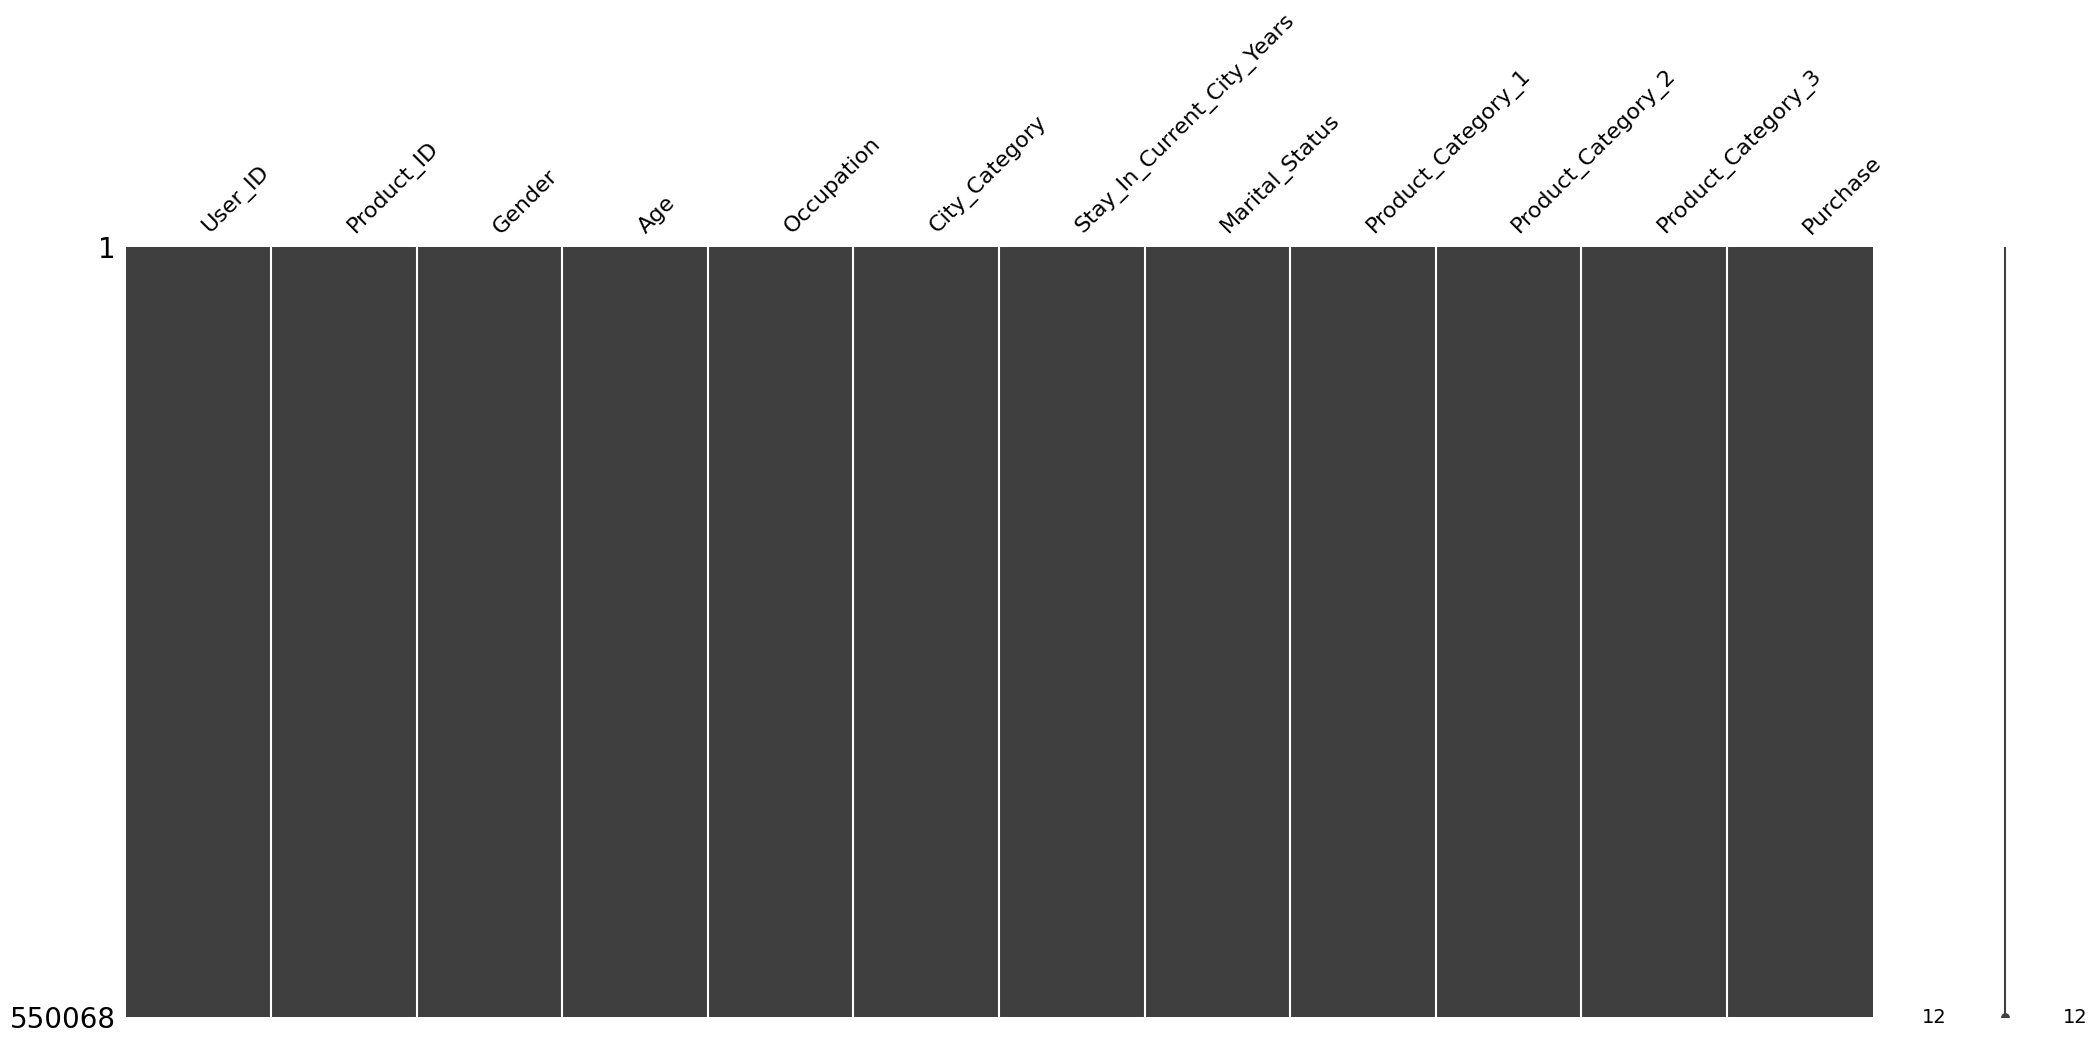

In [4]:
import missingno as mino
mino.matrix(train_df)

# cc_data.isna().sum()

In [5]:
import pandas as pd

# Define a function to categorize the 'Stay_In_Current_City_Years'
def categorize_stay(years):
    if years == '0' or years == '1':
        return 'newcomer'
    elif years == '2' or years == '3':
        return 'mid-stay'
    elif years == '4+':
        return 'long-stay'

# Apply the function to the train and test dataframes
train_df['Stay_Category'] = train_df['Stay_In_Current_City_Years'].apply(categorize_stay)

# Create dummy variables for the new 'Stay_Category' column
train_dummies = pd.get_dummies(train_df['Stay_Category'], prefix='Stay')


# Concatenate these dummy variables back to the original dataframe
train_df = pd.concat([train_df, train_dummies], axis=1)



train_df.drop('Stay_In_Current_City_Years', axis=1, inplace=True)

train_df.drop('Stay_Category', axis=1, inplace=True)


In [6]:
import pandas as pd

# Define a function to categorize age groups
def categorize_age(age_group):
    if age_group == '0-17':
        return 'Child'
    elif age_group == '18-25':
        return 'Young Adult'
    elif age_group == '26-35':
        return 'Adult'
    elif age_group == '36-45':
        return 'Middle-Aged'
    elif age_group == '46-50':
        return 'Middle-Aged'
    elif age_group == '51-55':
        return 'Middle-Aged'
    elif age_group == '55+':
        return 'Senior'
    else:
        return 'Unknown'

# Apply the function to the 'Age' column in train_df and test_df
train_df['Age_Group'] = train_df['Age'].apply(categorize_age)


# Create dummy variables for the new 'Age_Group' column
train_dummies = pd.get_dummies(train_df['Age_Group'], prefix='Age')

# Concatenate the dummy variables to the original dataframes
train_df = pd.concat([train_df, train_dummies], axis=1)


# Drop the original 'Age' and 'Age_Group' columns
train_df.drop(columns=['Age', 'Age_Group'], inplace=True)


In [7]:
train_df['Gender'] = train_df['Gender'].replace({'F': 0, 'M': 1})


In [8]:
import pandas as pd

# Define a function to categorize city categories
def categorize_city(city_category):
    if city_category == 'A':
        return 'in_A'
    elif city_category == 'B':
        return 'in_B'
    elif city_category == 'C':
        return 'in_C'
    else:
        return 'unknown'

# Apply the function to the 'City_Category' column in train_df and test_df
train_df['City_Category_Group'] = train_df['City_Category'].apply(categorize_city)


# Create dummy variables for the new 'City_Category_Group' column
train_dummies = pd.get_dummies(train_df['City_Category_Group'], prefix='City')


# Concatenate the dummy variables to the original dataframes
train_df = pd.concat([train_df, train_dummies], axis=1)


# Drop the original 'City_Category' and 'City_Category_Group' columns
train_df.drop(columns=['City_Category', 'City_Category_Group'], inplace=True)


In [9]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
X_train = train_df.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y_train = train_df['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Checking the shapes of the train and test sets
print("Shape of train data:", train_df.shape)



Shape of train data: (550068, 20)


In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = X_train.select_dtypes(include=['object']).columns

# Create a column transformer with OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep all other columns
)


In [11]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index([], dtype='object'))])

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [13]:
pipeline_lr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('regressor', LinearRegression())])

In [14]:
pipeline_lr.fit(X_train, y_train)

/Users/sunoo-dan/anaconda3/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('regressor', LinearRegression())])

In [15]:
test_predictions_lr = pipeline_lr.predict(X_test)


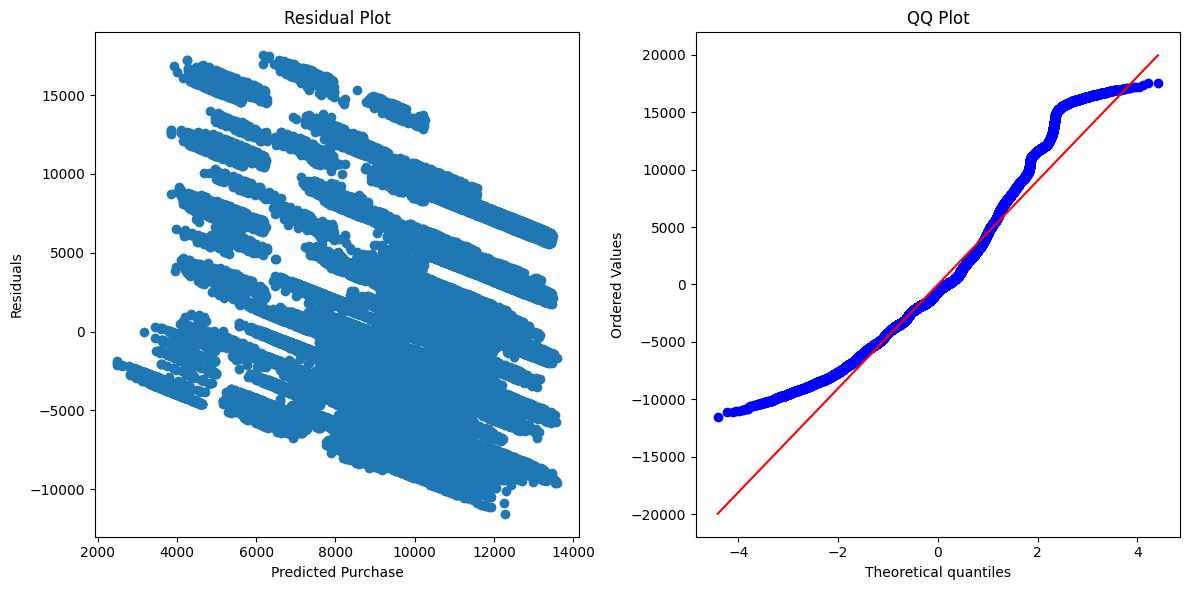

In [16]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate residuals
residuals_lr = y_test - test_predictions_lr

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(test_predictions_lr, residuals_lr)
plt.title('Residual Plot')
plt.xlabel('Predicted Purchase')
plt.ylabel('Residuals')

# Plot QQ plot
plt.subplot(1, 2, 2)
stats.probplot(residuals_lr, dist="norm", plot=plt)
plt.title('QQ Plot')

plt.tight_layout()
plt.show()


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(y_test, test_predictions_lr)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, test_predictions_lr)

# Calculate MSE
mse = mean_squared_error(y_test, test_predictions_lr)

print("MAE:", mae)
print("MAPE:", mape)
print("MSE:", mse)


MAE: 3523.114457667052
MAPE: 118.98885154371716
MSE: 21318979.19334939


In [18]:
### ridge 

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

# Create a pipeline for Ridge regression
pipeline_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])


In [20]:
pipeline_ridge.fit(X_train, y_train)
test_predictions_ridge = pipeline_ridge.predict(X_test)


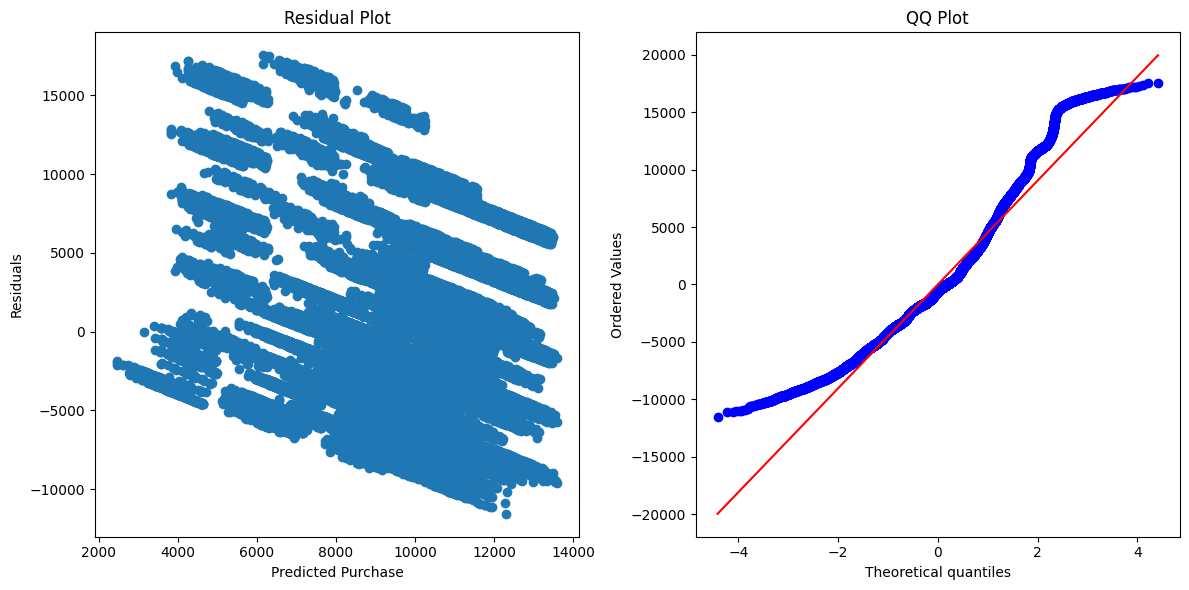

In [21]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate residuals
residuals_ridge = y_test - test_predictions_ridge

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(test_predictions_ridge, residuals_ridge)
plt.title('Residual Plot')
plt.xlabel('Predicted Purchase')
plt.ylabel('Residuals')

# Plot QQ plot
plt.subplot(1, 2, 2)
stats.probplot(residuals_ridge, dist="norm", plot=plt)
plt.title('QQ Plot')

plt.tight_layout()
plt.show()

In [22]:
# Calculate MAE
mae_ridge = mean_absolute_error(y_test, test_predictions_ridge)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_ridge = mean_absolute_percentage_error(y_test, test_predictions_ridge)

# Calculate MSE
mse_ridge = mean_squared_error(y_test, test_predictions_ridge)

print("Mean Absolute Error (MAE) for Ridge:", mae_ridge)
print("Mean Absolute Percentage Error (MAPE) for Ridge:", mape_ridge)
print("Mean Squared Error (MSE) for Ridge:", mse_ridge)

Mean Absolute Error (MAE) for Ridge: 3523.4215950040902
Mean Absolute Percentage Error (MAPE) for Ridge: 118.9269369348098
Mean Squared Error (MSE) for Ridge: 21319084.04414193


In [23]:
### lasso

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

# Define the pipeline
pipeline_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])


In [25]:
pipeline_lasso.fit(X_train, y_train)
test_predictions_lasso = pipeline_lasso.predict(X_test)


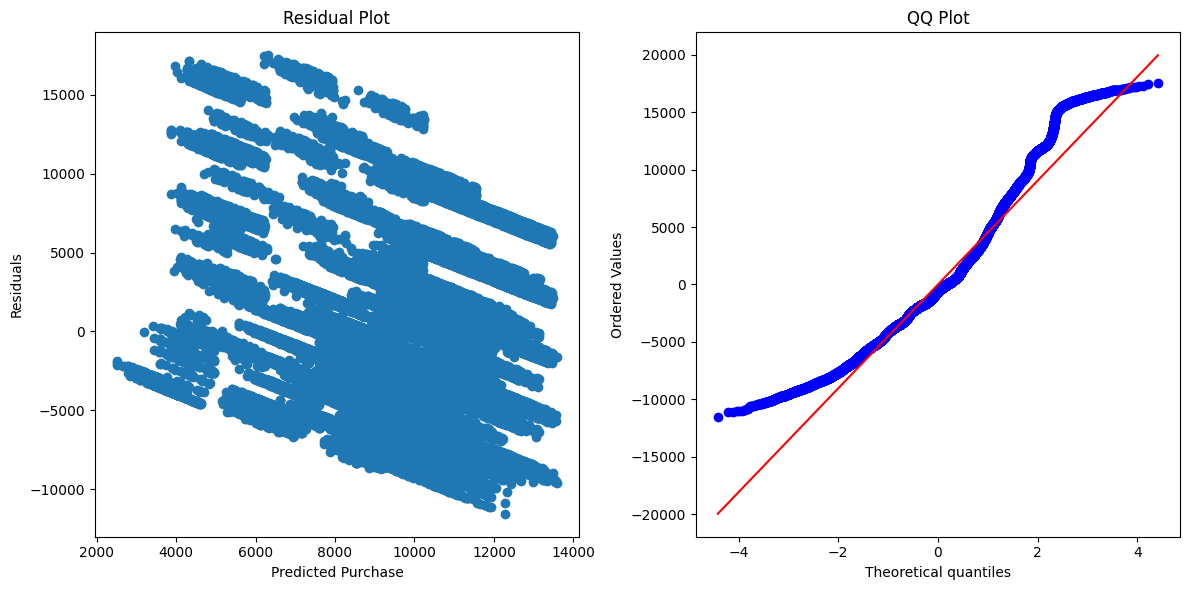

In [26]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate residuals
residuals_lasso = y_test - test_predictions_lasso

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(test_predictions_lasso, residuals_lasso)
plt.title('Residual Plot')
plt.xlabel('Predicted Purchase')
plt.ylabel('Residuals')

# Plot QQ plot
plt.subplot(1, 2, 2)
stats.probplot(residuals_lasso, dist="norm", plot=plt)
plt.title('QQ Plot')

plt.tight_layout()
plt.show()

In [27]:
# Calculate MAE
mae_lasso = mean_absolute_error(y_test, test_predictions_lasso)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_lasso = mean_absolute_percentage_error(y_test, test_predictions_lasso)

# Calculate MSE
mse_lasso = mean_squared_error(y_test, test_predictions_lasso)

# Print the evaluation metrics
print("MAE for Lasso:", mae_lasso)
print("MAPE for Lasso:", mape_lasso)
print("MSE for Lasso:", mse_lasso)

MAE for Lasso: 3523.212658399057
MAPE for Lasso: 118.93833146677602
MSE for Lasso: 21319203.43995118


In [28]:
### LGBM

In [29]:
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor

# Define the pipeline for LightGBM
pipeline_lgbm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor())
])

# Fit the pipeline to the training data
pipeline_lgbm.fit(X_train, y_train)

# Make predictions on the test data
test_predictions_lgbm = pipeline_lgbm.predict(X_test)

# Calculate evaluation metrics
mae_lgbm = mean_absolute_error(y_test, test_predictions_lgbm)
mape_lgbm = mean_absolute_percentage_error(y_test, test_predictions_lgbm)
mse_lgbm = mean_squared_error(y_test, test_predictions_lgbm)

# Print the evaluation metrics
print("MAE for LightGBM:", mae_lgbm)
print("MAPE for LightGBM:", mape_lgbm)
print("MSE for LightGBM:", mse_lgbm)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 104
[LightGBM] [Info] Number of data points in the train set: 412551, number of used features: 17
[LightGBM] [Info] Start training from score 9263.500202
MAE for LightGBM: 2197.2709302964754
MAPE for LightGBM: 36.97824621970086
MSE for LightGBM: 8556174.967506818


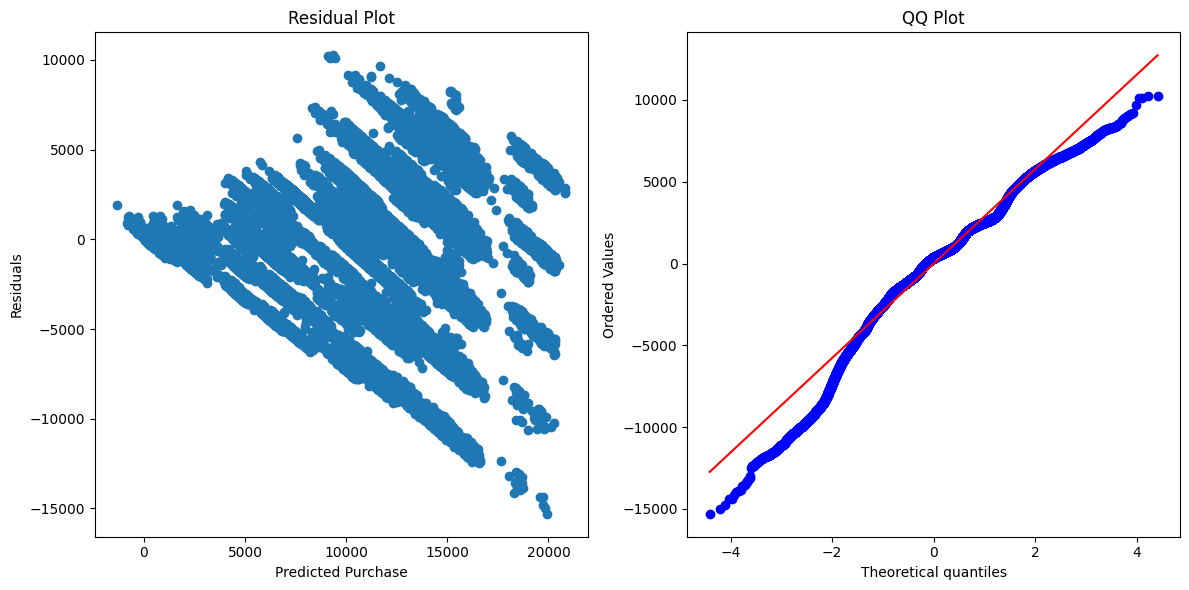

In [30]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate residuals
residuals_lgbm = y_test - test_predictions_lgbm

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(test_predictions_lgbm, residuals_lgbm)
plt.title('Residual Plot')
plt.xlabel('Predicted Purchase')
plt.ylabel('Residuals')

# Plot QQ plot
plt.subplot(1, 2, 2)
stats.probplot(residuals_lgbm, dist="norm", plot=plt)
plt.title('QQ Plot')

plt.tight_layout()
plt.show()

In [31]:
###random forest 

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Define the pipeline for Random Forest
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Fit the pipeline to the training data
pipeline_rf.fit(X_train, y_train)

# Make predictions on the test data
test_predictions_rf = pipeline_rf.predict(X_test)

# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, test_predictions_rf)
mape_rf = mean_absolute_percentage_error(y_test, test_predictions_rf)
mse_rf = mean_squared_error(y_test, test_predictions_rf)

# Print the evaluation metrics
print("MAE for Random Forest:", mae_rf)
print("MAPE for Random Forest:", mape_rf)
print("MSE for Random Forest:", mse_rf)


MAE for Random Forest: 2239.6197624291276
MAPE for Random Forest: 33.4829841868091
MSE for Random Forest: 9403288.473728603


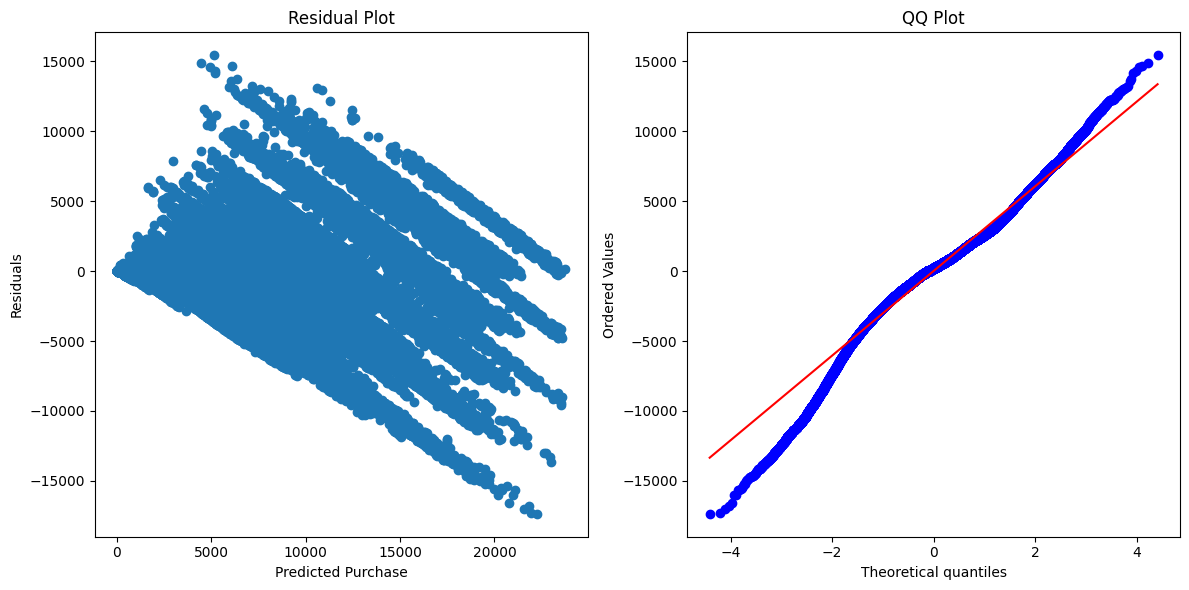

In [33]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate residuals
residuals_rf = y_test - test_predictions_rf

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(test_predictions_rf, residuals_rf)
plt.title('Residual Plot')
plt.xlabel('Predicted Purchase')
plt.ylabel('Residuals')

# Plot QQ plot
plt.subplot(1, 2, 2)
stats.probplot(residuals_rf, dist="norm", plot=plt)
plt.title('QQ Plot')

plt.tight_layout()
plt.show()

In [34]:
### XGB

In [35]:
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

# Define the pipeline for XGBoost
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])

# Fit the pipeline to the training data
pipeline_xgb.fit(X_train, y_train)

# Make predictions on the test data
test_predictions_xgb = pipeline_xgb.predict(X_test)

# Calculate evaluation metrics
mae_xgb = mean_absolute_error(y_test, test_predictions_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, test_predictions_xgb)
mse_xgb = mean_squared_error(y_test, test_predictions_xgb)

# Print the evaluation metrics
print("MAE for XGBoost:", mae_xgb)
print("MAPE for XGBoost:", mape_xgb)
print("MSE for XGBoost:", mse_xgb)


MAE for XGBoost: 2162.7273299534954
MAPE for XGBoost: 36.16970553269233
MSE for XGBoost: 8386285.415017412


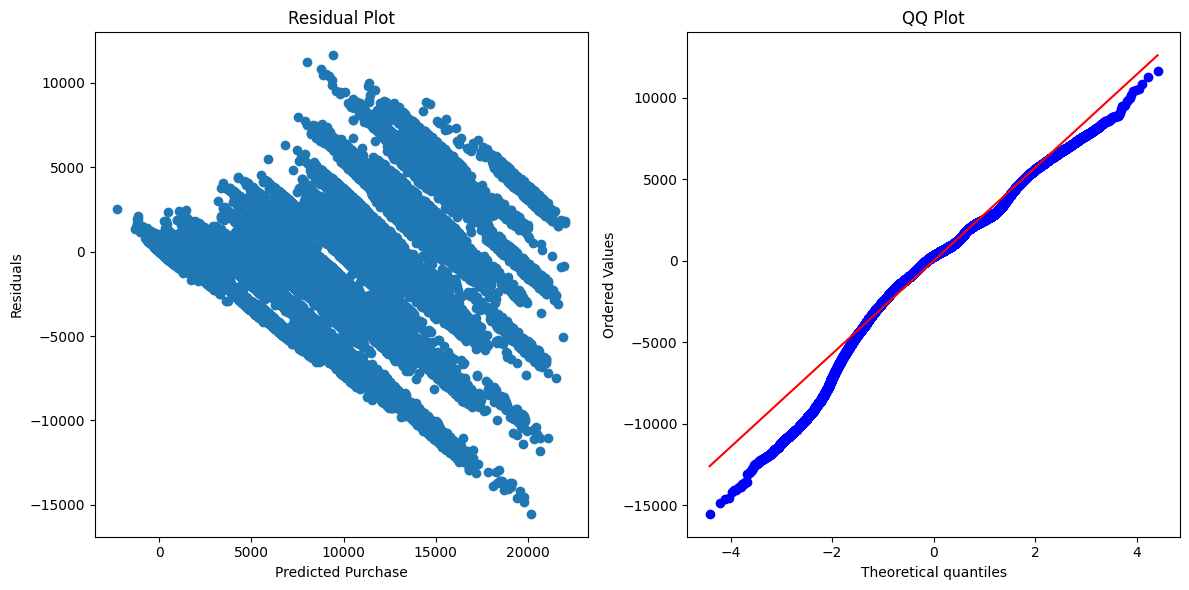

In [36]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate residuals
residuals_xgb = y_test - test_predictions_xgb

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(test_predictions_xgb, residuals_xgb)
plt.title('Residual Plot')
plt.xlabel('Predicted Purchase')
plt.ylabel('Residuals')

# Plot QQ plot
plt.subplot(1, 2, 2)
stats.probplot(residuals_xgb, dist="norm", plot=plt)
plt.title('QQ Plot')

plt.tight_layout()
plt.show()

In [37]:
### let's tune the XGB as well

### Best Parameters: {'regressor__colsample_bytree': 1.0, 'regressor__gamma': 0, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 7, 'regressor__min_child_weight': 1, 'regressor__n_estimators': 200, 'regressor__reg_alpha': 0.5, 'regressor__reg_lambda': 0.5, 'regressor__subsample': 1.0}

In [38]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the parameter grid
param_grid = {
    'regressor__learning_rate': [ 0.1],
    'regressor__n_estimators': [200],
    'regressor__max_depth': [7],
    'regressor__min_child_weight': [1],
    'regressor__gamma': [0],
    'regressor__subsample': [1.0],
    'regressor__colsample_bytree': [1.0],
    'regressor__reg_alpha': [0.5],
    'regressor__reg_lambda': [0.5],
}

# Initialize the pipeline with XGBoost regressor
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline_xgb, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
test_predictions_best_xgb = best_model.predict(X_test)

# Calculate evaluation metrics for the best model
mae_best_xgb = mean_absolute_error(y_test, test_predictions_best_xgb)
mape_best_xgb = mean_absolute_percentage_error(y_test, test_predictions_best_xgb)
mse_best_xgb = mean_squared_error(y_test, test_predictions_best_xgb)

# Print evaluation metrics for the best model
print("Best Model Evaluation Metrics:")
print("MAE for XGBoost:", mae_best_xgb)
print("MAPE for XGBoost:", mape_best_xgb)
print("MSE for XGBoost:", mse_best_xgb)


Best Parameters: {'regressor__colsample_bytree': 1.0, 'regressor__gamma': 0, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 7, 'regressor__min_child_weight': 1, 'regressor__n_estimators': 200, 'regressor__reg_alpha': 0.5, 'regressor__reg_lambda': 0.5, 'regressor__subsample': 1.0}
Best Model Evaluation Metrics:
MAE for XGBoost: 2160.1223272700763
MAPE for XGBoost: 35.19237063734476
MSE for XGBoost: 8375204.52921861


In [39]:
### try stack

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Preprocessor
categorical_features = []
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Pipelines
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

pipeline_lgbm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor())
])

# Fit the models
pipeline_xgb.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)
pipeline_lgbm.fit(X_train, y_train)

# Predictions
test_predictions_xgb = pipeline_xgb.predict(X_test)
test_predictions_rf = pipeline_rf.predict(X_test)
test_predictions_lgbm = pipeline_lgbm.predict(X_test)

# Stacked predictions
stacked_predictions = (test_predictions_xgb + test_predictions_rf + test_predictions_lgbm) / 3

# Calculate evaluation metrics for the stacked model
mae_stacked = mean_absolute_error(y_test, stacked_predictions)
mse_stacked = mean_squared_error(y_test, stacked_predictions)

# Print the evaluation metrics for the stacked model
print("MAE for Stacked Model:", mae_stacked)
print("MSE for Stacked Model:", mse_stacked)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 104
[LightGBM] [Info] Number of data points in the train set: 412551, number of used features: 17
[LightGBM] [Info] Start training from score 9263.500202
MAE for Stacked Model: 2158.486382716404
MSE for Stacked Model: 8402370.446453732


In [41]:
import numpy as np

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for stacked predictions
mape_stacked = mean_absolute_percentage_error(y_test, stacked_predictions)

# Print the MAPE for the stacked model
print("MAPE for Stacked Model:", mape_stacked)


MAPE for Stacked Model: 34.641283277683165


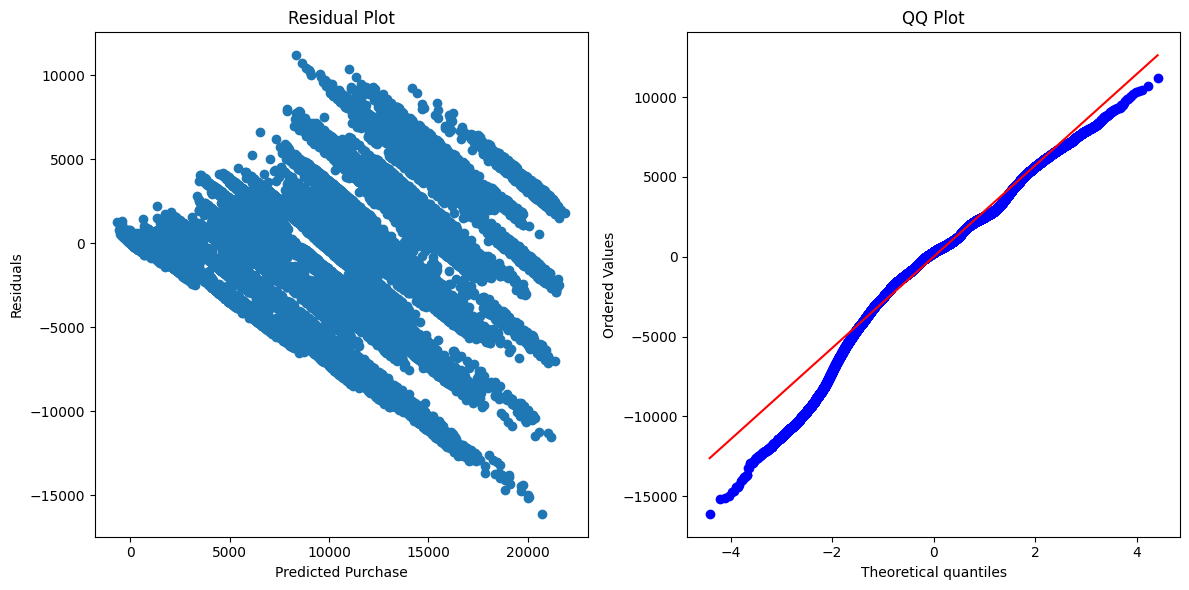

In [42]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate residuals
residuals_stacked = y_test - stacked_predictions

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(stacked_predictions, residuals_stacked)
plt.title('Residual Plot')
plt.xlabel('Predicted Purchase')
plt.ylabel('Residuals')

# Plot QQ plot
plt.subplot(1, 2, 2)
stats.probplot(residuals_stacked, dist="norm", plot=plt)
plt.title('QQ Plot')

plt.tight_layout()
plt.show()

### Non linear model has better performance regarding to the performance metrics, let's see the perfomance of each of the non linear model under different range of purchase prediction amount.

### for the below visualization on performance, model works better in low to mid value of purchase amount prediction but less for higher amount, indeed with purchase less than 14000 covers almost 85% of the total sample. (I split the purchase amount into 0-7000, 7000-14000, and 14000+ and see how's the prediciton in this range works)

In [43]:
### RF PREDICTION

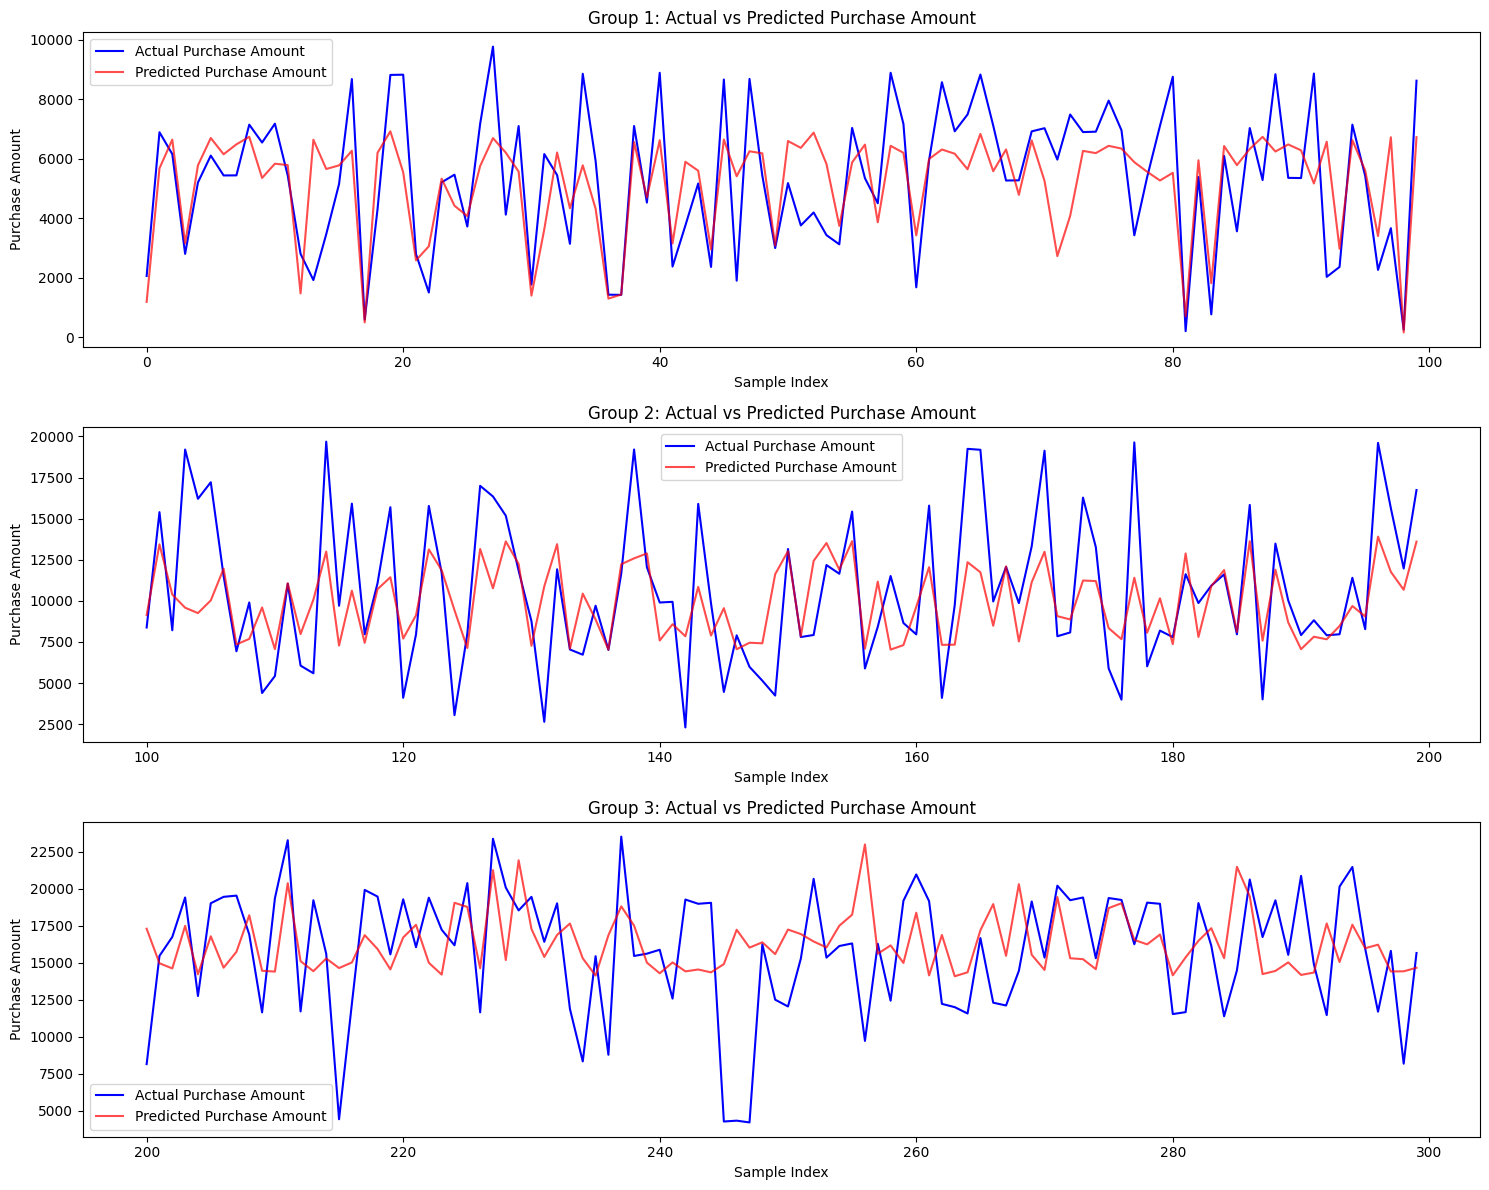

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual Purchase Amount': y_test.values,
    'Predicted Purchase Amount': test_predictions_rf
})

# Sort the DataFrame by the predicted values
results_df = results_df.sort_values(by='Predicted Purchase Amount').reset_index(drop=True)

# Define the purchase amount thresholds
thresholds = [7000, 14000]

# Create a column to indicate the group based on the purchase amount
results_df['Group'] = pd.cut(results_df['Predicted Purchase Amount'], bins=[-np.inf] + thresholds + [np.inf], labels=False, right=False)

# Sample 100 values from each group for plotting
sampled_df = results_df.groupby('Group').apply(lambda x: x.sample(n=100, random_state=42)).reset_index(drop=True)

# Plot the actual and predicted values for each group
plt.figure(figsize=(15, 12))
for group in range(len(thresholds) + 1):
    group_data = sampled_df[sampled_df['Group'] == group]
    plt.subplot(len(thresholds) + 1, 1, group + 1)
    plt.plot(group_data.index, group_data['Actual Purchase Amount'], label='Actual Purchase Amount', color='blue')
    plt.plot(group_data.index, group_data['Predicted Purchase Amount'], label='Predicted Purchase Amount', color='red', alpha=0.7)
    plt.xlabel('Sample Index')
    plt.ylabel('Purchase Amount')
    plt.title(f'Group {group + 1}: Actual vs Predicted Purchase Amount')
    plt.legend()

plt.tight_layout()
plt.show()


In [45]:
# Calculate the number of samples in each group
group_counts = results_df['Group'].value_counts().sort_index()

# Calculate the total number of samples
total_samples = len(results_df)

# Calculate the percentage of samples in each group
group_percentages = (group_counts / total_samples) * 100

# Display the number of samples and the percentage for each group
for group, count, percentage in zip(group_counts.index, group_counts, group_percentages):
    print(f"Group {group + 1}: {count} samples ({percentage:.2f}% of total)")


Group 1: 52990 samples (38.53% of total)
Group 2: 59119 samples (42.99% of total)
Group 3: 25408 samples (18.48% of total)


In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize lists to store evaluation metrics for each group
mae_per_group = []
mape_per_group = []
mse_per_group = []

# Calculate evaluation metrics for each group
for group in range(len(thresholds) + 1):
    group_data = results_df[results_df['Group'] == group]
    actual = group_data['Actual Purchase Amount']
    predicted = group_data['Predicted Purchase Amount']
    
    # Calculate MAE for the group
    mae = mean_absolute_error(actual, predicted)
    mae_per_group.append(mae)
    
    # Calculate MAPE for the group
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    mape_per_group.append(mape)
    
    # Calculate MSE for the group
    mse = mean_squared_error(actual, predicted)
    mse_per_group.append(mse)

# Display evaluation metrics for each group
for group, mae, mape, mse in zip(range(len(thresholds) + 1), mae_per_group, mape_per_group, mse_per_group):
    print(f"Group {group + 1}:")
    print(f"  MAE: {mae:.2f}")
    print(f"  MAPE: {mape:.2f}%")
    print(f"  MSE: {mse:.2f}")
    print()


Group 1:
  MAE: 1459.98
  MAPE: 35.93%
  MSE: 3643168.98

Group 2:
  MAE: 2480.55
  MAPE: 31.85%
  MSE: 10836464.37

Group 3:
  MAE: 3307.99
  MAPE: 32.19%
  MSE: 18127553.14



In [47]:
### let's see XGB

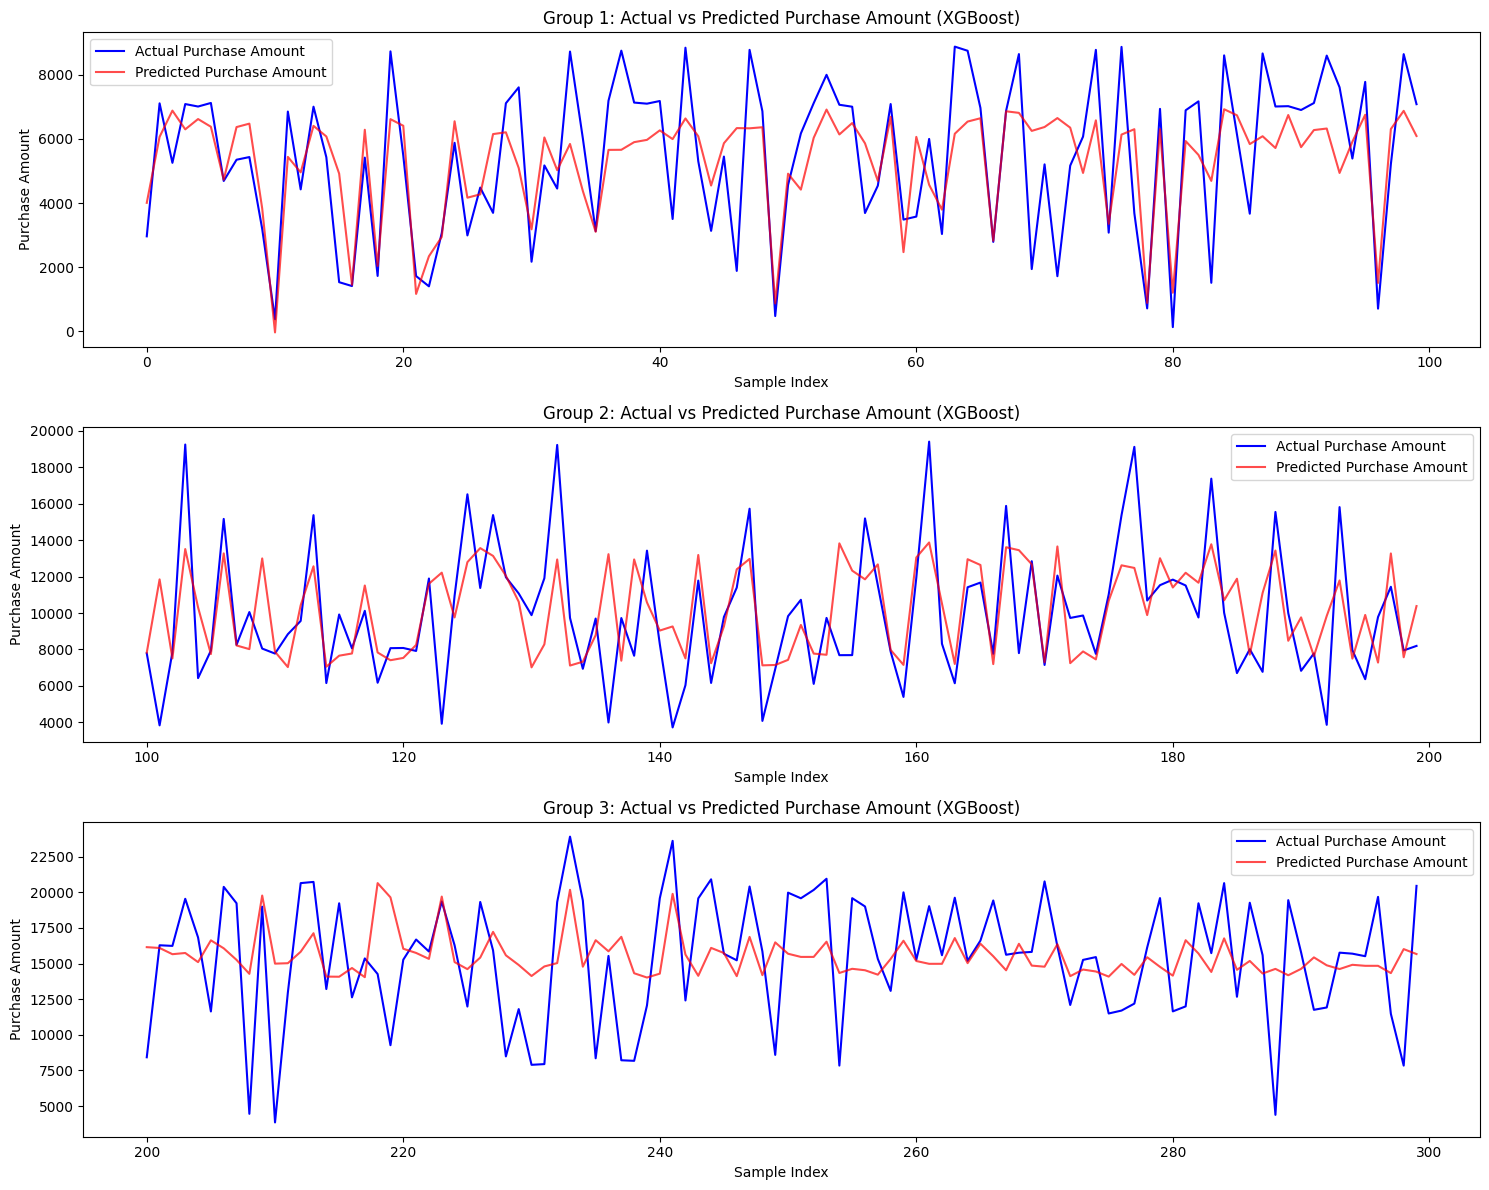

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted values for XGB
results_df_xgb = pd.DataFrame({
    'Actual Purchase Amount': y_test.values,
    'Predicted Purchase Amount': test_predictions_xgb
})

# Sort the DataFrame by the predicted values
results_df_xgb = results_df_xgb.sort_values(by='Predicted Purchase Amount').reset_index(drop=True)

# Define the purchase amount thresholds
thresholds = [7000, 14000]

# Create a column to indicate the group based on the purchase amount
results_df_xgb['Group'] = pd.cut(results_df_xgb['Predicted Purchase Amount'], bins=[-np.inf] + thresholds + [np.inf], labels=False, right=False)

# Sample 100 values from each group for plotting
sampled_df_xgb = results_df_xgb.groupby('Group').apply(lambda x: x.sample(n=100, random_state=42)).reset_index(drop=True)

# Plot the actual and predicted values for each group for XGB
plt.figure(figsize=(15, 12))
for group in range(len(thresholds) + 1):
    group_data = sampled_df_xgb[sampled_df_xgb['Group'] == group]
    plt.subplot(len(thresholds) + 1, 1, group + 1)
    plt.plot(group_data.index, group_data['Actual Purchase Amount'], label='Actual Purchase Amount', color='blue')
    plt.plot(group_data.index, group_data['Predicted Purchase Amount'], label='Predicted Purchase Amount', color='red', alpha=0.7)
    plt.xlabel('Sample Index')
    plt.ylabel('Purchase Amount')
    plt.title(f'Group {group + 1}: Actual vs Predicted Purchase Amount (XGBoost)')
    plt.legend()

plt.tight_layout()
plt.show()


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define a function to calculate MAE, MAPE, and MSE for each group
def calculate_metrics_for_group(group_data):
    actual = group_data['Actual Purchase Amount']
    predicted = group_data['Predicted Purchase Amount']
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, mse, mape

# Calculate metrics for each group
metrics_per_group_xgb = {}
for group in range(len(thresholds) + 1):
    group_data = sampled_df_xgb[sampled_df_xgb['Group'] == group]
    mae, mse, mape = calculate_metrics_for_group(group_data)
    metrics_per_group_xgb[f'Group {group + 1}'] = {'MAE': mae, 'MSE': mse, 'MAPE': mape}

# Print the metrics for each group
for group, metrics in metrics_per_group_xgb.items():
    print(f"{group}:")
    print(f"  MAE: {metrics['MAE']:.2f}")
    print(f"  MSE: {metrics['MSE']:.2f}")
    print(f"  MAPE: {metrics['MAPE']:.2f}%")


Group 1:
  MAE: 1304.04
  MSE: 2711907.06
  MAPE: 42.71%
Group 2:
  MAE: 2224.44
  MSE: 9070070.26
  MAPE: 28.61%
Group 3:
  MAE: 3429.33
  MSE: 18451159.18
  MAPE: 31.12%


In [50]:
### now stack

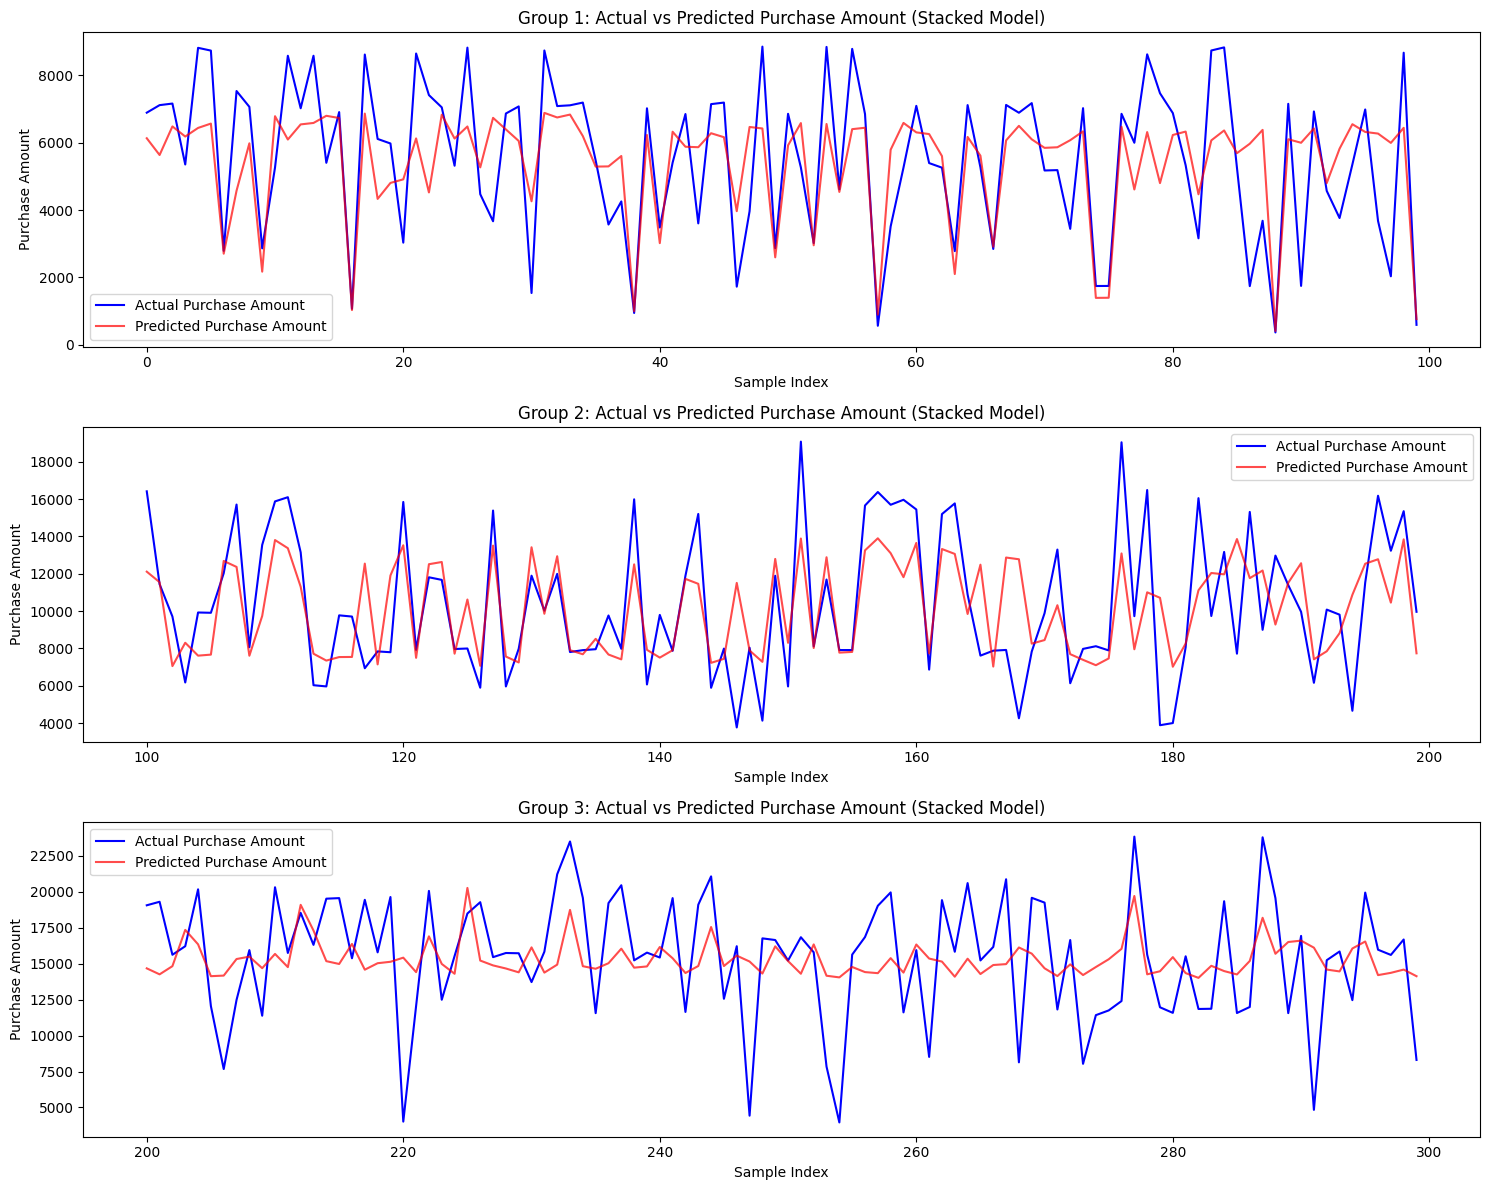

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted values for the stacked model
results_df_stacked = pd.DataFrame({
    'Actual Purchase Amount': y_test.values,
    'Predicted Purchase Amount': stacked_predictions
})

# Sort the DataFrame by the predicted values
results_df_stacked = results_df_stacked.sort_values(by='Predicted Purchase Amount').reset_index(drop=True)

# Define the purchase amount thresholds
thresholds = [7000, 14000]

# Create a column to indicate the group based on the purchase amount
results_df_stacked['Group'] = pd.cut(results_df_stacked['Predicted Purchase Amount'], bins=[-np.inf] + thresholds + [np.inf], labels=False, right=False)

# Sample 100 values from each group for plotting
sampled_df_stacked = results_df_stacked.groupby('Group').apply(lambda x: x.sample(n=100, random_state=42)).reset_index(drop=True)

# Plot the actual and predicted values for each group
plt.figure(figsize=(15, 12))
for group in range(len(thresholds) + 1):
    group_data = sampled_df_stacked[sampled_df_stacked['Group'] == group]
    plt.subplot(len(thresholds) + 1, 1, group + 1)
    plt.plot(group_data.index, group_data['Actual Purchase Amount'], label='Actual Purchase Amount', color='blue')
    plt.plot(group_data.index, group_data['Predicted Purchase Amount'], label='Predicted Purchase Amount', color='red', alpha=0.7)
    plt.xlabel('Sample Index')
    plt.ylabel('Purchase Amount')
    plt.title(f'Group {group + 1}: Actual vs Predicted Purchase Amount (Stacked Model)')
    plt.legend()

plt.tight_layout()
plt.show()


In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate evaluation metrics for each group
mae_per_group_stacked = []
mape_per_group_stacked = []
mse_per_group_stacked = []

for group in range(len(thresholds) + 1):
    group_data = sampled_df_stacked[sampled_df_stacked['Group'] == group]
    actual = group_data['Actual Purchase Amount']
    predicted = group_data['Predicted Purchase Amount']
    
    # Calculate MAE for the group
    mae = mean_absolute_error(actual, predicted)
    mae_per_group_stacked.append(mae)
    
    # Calculate MAPE for the group
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    mape_per_group_stacked.append(mape)
    
    # Calculate MSE for the group
    mse = mean_squared_error(actual, predicted)
    mse_per_group_stacked.append(mse)

# Print the evaluation metrics for each group
for i, group in enumerate(range(len(thresholds) + 1)):
    print(f"Group {group + 1}:")
    print(f"  MAE: {mae_per_group_stacked[i]:.2f}")
    print(f"  MAPE: {mape_per_group_stacked[i]:.2f}%")
    print(f"  MSE: {mse_per_group_stacked[i]:.2f}")


Group 1:
  MAE: 1307.03
  MAPE: 31.12%
  MSE: 2705103.66
Group 2:
  MAE: 2199.55
  MAPE: 26.12%
  MSE: 8153515.74
Group 3:
  MAE: 3254.43
  MAPE: 29.83%
  MSE: 16223287.87


## CONCLUSION: MODEL SELECTION: XGB, MODEL MAE  = $2160.091435283008，MAPE = 35.19%
Group 1:
  MAE: 1304.04
  MSE: 2711907.06
  MAPE: 42.71%
Group 2:
  MAE: 2197.73
  MSE: 8740811.62
  MAPE: 27.15%
Group 3:
  MAE: 3608.51
  MSE: 20419380.09
  MAPE: 33.40%
  
Group 1: 52961 samples (38.51% of total)
Group 2: 59056 samples (42.94% of total)
Group 3: 25500 samples (18.54% of total)


***GROUP ARE DIVIDED BASE ON DOLLOAR AMOUNT OF PURCHASE, smaller MAE and MAPE means smaller deviation.

## FEATURE ANALYSIS AND KEY FINDINGS 

In [53]:
### deeper look to the model: feature importance 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


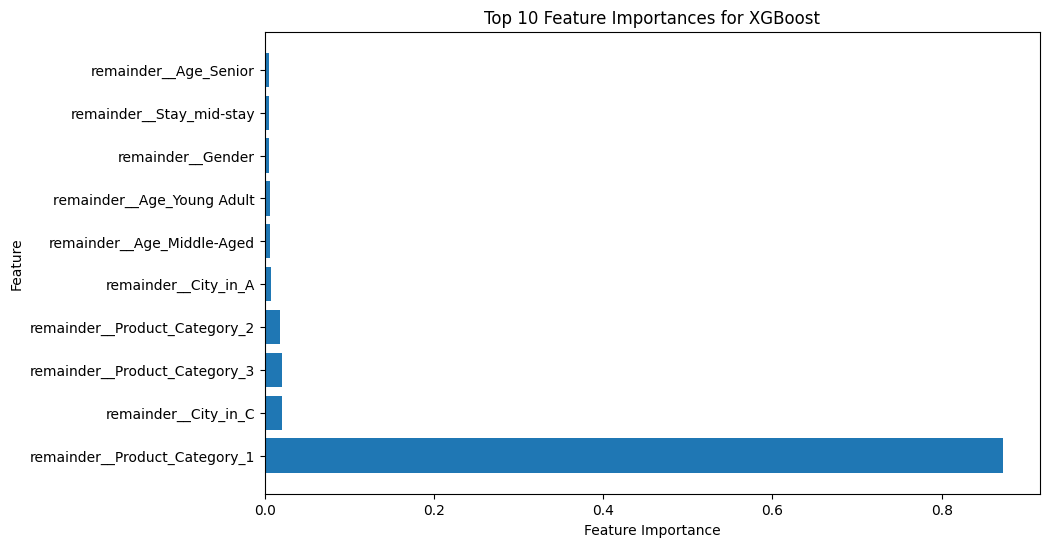

In [54]:
import warnings
import shap
import matplotlib.pyplot as plt
import numpy as np

# Ignore all warnings
warnings.filterwarnings('ignore')

# Define the pipeline for XGBoost
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror'))
])

# Parameter grid for the grid search
param_grid = {
    'regressor__learning_rate': [0.1],
    'regressor__n_estimators': [200],
    'regressor__max_depth': [7],
    'regressor__min_child_weight': [1],
    'regressor__gamma': [0],
    'regressor__subsample': [1.0],
    'regressor__colsample_bytree': [1.0],
    'regressor__reg_alpha': [0.5],
    'regressor__reg_lambda': [0.5],
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline_xgb, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_pipeline_xgb = grid_search.best_estimator_

# Extract the trained XGBoost model from the best pipeline
xgb_model = best_pipeline_xgb.named_steps['regressor']

# Make predictions on the test data
test_predictions_xgb = best_pipeline_xgb.predict(X_test)

# Get feature importances
importances = xgb_model.feature_importances_

# Get the original feature names
all_feature_names = best_pipeline_xgb.named_steps['preprocessor'].get_feature_names_out()

# Plot feature importances
plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(importances)[::-1]
top_features = min(10, len(importances))  # Ensure not to exceed the number of available features
plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
plt.yticks(range(top_features), all_feature_names[sorted_idx][:top_features])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances for XGBoost'.format(top_features))
plt.show()



In [55]:
### let's rethnik the xgb, to better understand, now we switch the last two category into binary

In [56]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
X_train = train_df.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y_train = train_df['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Checking the shapes of the train and test sets
print("Shape of train data:", train_df.shape)


Shape of train data: (550068, 20)


In [57]:
### with this prediction result, let's see if there is any potential way to increase the overall profit,

In [58]:
### let's see how's the purchase amount is being distributed 

In [59]:
### SEXUALITY 

In [60]:



# Calculate the number of predictions for females and males
female_predictions = test_predictions_xgb[X_test['Gender'] == 0]
male_predictions = test_predictions_xgb[X_test['Gender'] == 1]

# Count the number of predictions for each gender
num_female_predictions = len(female_predictions)
num_male_predictions = len(male_predictions)

print("Number of predictions from females:", num_female_predictions)
print("Number of predictions from males:", num_male_predictions)


Number of predictions from females: 34149
Number of predictions from males: 103368


### here we look at the numbers of male and female in sample size, and found that male has larger amount, hence it will be better to analyze the average purchase amount rather than total 

In [61]:
# Calculate the average purchase amount for females and males
average_purchase_female = np.mean(female_predictions)
average_purchase_male = np.mean(male_predictions)

print("Average purchase amount for females:", average_purchase_female)
print("Average purchase amount for males:", average_purchase_male)



Average purchase amount for females: 8744.7705
Average purchase amount for males: 9443.017


In [62]:
# Initialize an empty DataFrame to store the results
predictions_by_age_gender = pd.DataFrame(columns=['Gender', 'Age Group', 'Average Prediction', 'Total Purchase Amount'])

# Define age groups and genders
age_groups = ['Age_Child', 'Age_Young Adult', 'Age_Adult', 'Age_Middle-Aged', 'Age_Senior']
genders = [0, 1]  # 0 for female, 1 for male

# Calculate average and total purchase amounts for each combination of age group and gender
for gender in genders:
    for age_group in age_groups:
        # Filter data for the current age group and gender
        filtered_data = test_predictions_xgb[(X_test['Gender'] == gender) & (X_test[age_group] == 1)]
        
        # Calculate the average prediction for the current gender and age group
        average_prediction = filtered_data.mean()
        
        # Calculate the total purchase amount for the current gender and age group
        total_purchase_amount = filtered_data.sum()
        
        # Append the results to the DataFrame
        predictions_by_age_gender = predictions_by_age_gender.append({
            'Gender': 'Female' if gender == 0 else 'Male',
            'Age Group': age_group,
            'Average Prediction': average_prediction,
            'Total Purchase Amount': total_purchase_amount
        }, ignore_index=True)


### we can see female has lower purchase amount compare to male (below visualization)

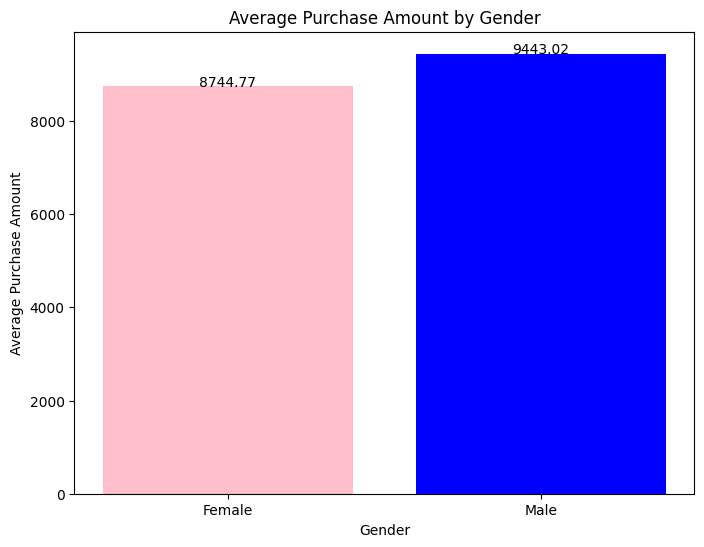

In [63]:
import matplotlib.pyplot as plt

# Data
genders = ['Female', 'Male']
average_purchase = [average_purchase_female, average_purchase_male]

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(genders, average_purchase, color=['pink', 'blue'])
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount by Gender')

# Display the numerical values on top of each bar
for bar, value in zip(bars, average_purchase):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.1, 
             round(value, 2), 
             ha='center', 
             color='black',
             fontsize=10)

plt.show()



### now let's add age into consideration AGE

In [64]:
import pandas as pd

# Initialize an empty DataFrame to store the results
average_predictions_table = pd.DataFrame(columns=['Gender', 'Age Group', 'Average Prediction'])
age_groups = ['Age_Child', 'Age_Young Adult', 'Age_Adult', 'Age_Middle-Aged', 'Age_Senior']


# Iterate over each gender and age group combination
for gender in [0, 1]:  # 0 for female, 1 for male
    for age_group in age_groups:
        # Filter predictions for the current gender and age group
        filtered_predictions = test_predictions_xgb[(X_test['Gender'] == gender) & (X_test[age_group] == 1)]
        
        # Calculate the average prediction amount
        average_prediction = filtered_predictions.mean()
        
        # Append the results to the DataFrame
        average_predictions_table = average_predictions_table.append({
            'Gender': 'Female' if gender == 0 else 'Male',
            'Age Group': age_group,
            'Average Prediction': average_prediction
        }, ignore_index=True)

# Display the table
print(average_predictions_table)


   Gender        Age Group  Average Prediction
0  Female        Age_Child         8298.541016
1  Female  Age_Young Adult         8395.374023
2  Female        Age_Adult         8688.749023
3  Female  Age_Middle-Aged         8984.559570
4  Female       Age_Senior         9081.733398
5    Male        Age_Child         9124.172852
6    Male  Age_Young Adult         9467.653320
7    Male        Age_Adult         9431.480469
8    Male  Age_Middle-Aged         9469.213867
9    Male       Age_Senior         9411.656250


### clearly we can see female purchase amount is significantly lower than male amount, now let's look deeper to different age group

In [65]:
### let's do a hypothesis testing to see whether there is sig diff between male and female 

In [66]:
from scipy.stats import ttest_ind

# Perform t-tests for each age group
for age_group in age_groups:
    female_data = test_predictions_xgb[(X_test['Gender'] == 0) & (X_test[age_group] == 1)]
    male_data = test_predictions_xgb[(X_test['Gender'] == 1) & (X_test[age_group] == 1)]
    
    t_stat, p_value = ttest_ind(female_data, male_data)
    print(f'Age Group: {age_group}, T-Statistic: {t_stat}, P-Value: {p_value}')


Age Group: Age_Child, T-Statistic: -5.798479198666654, P-Value: 7.245433000163298e-09
Age Group: Age_Young Adult, T-Statistic: -18.355250670658712, P-Value: 9.334665010547404e-75
Age Group: Age_Adult, T-Statistic: -18.273540433828494, P-Value: 2.2349428566454386e-74
Age Group: Age_Middle-Aged, T-Statistic: -11.207086594017591, P-Value: 4.08648642999584e-29
Age Group: Age_Senior, T-Statistic: -2.3717112160230864, P-Value: 0.01774150277465378


In [67]:
### let's also see visually 

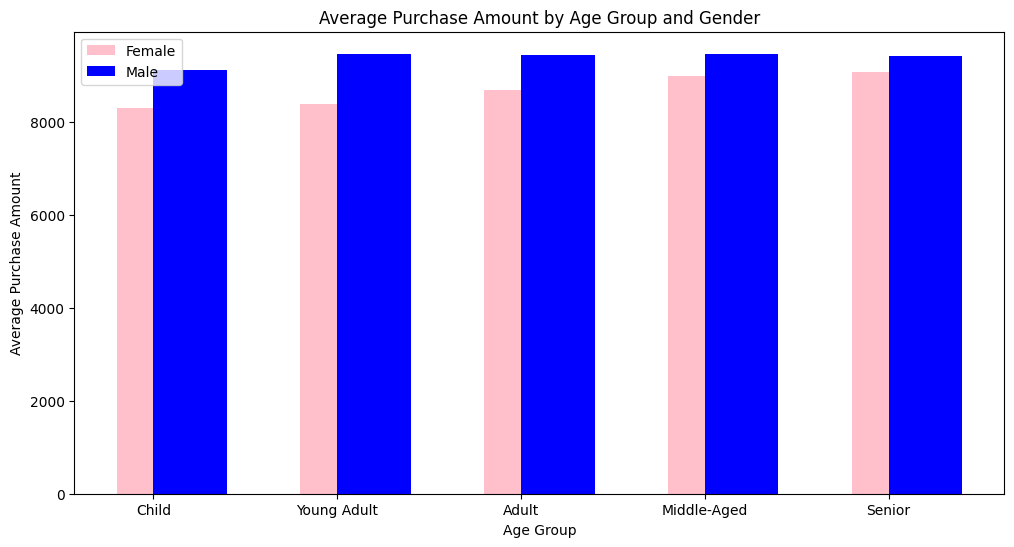

In [68]:
import matplotlib.pyplot as plt



# Prepare data for plotting
age_labels = ['Child', 'Young Adult', 'Adult', 'Middle-Aged', 'Senior']
female_averages = predictions_by_age_gender[predictions_by_age_gender['Gender'] == 'Female']['Average Prediction'].values
male_averages = predictions_by_age_gender[predictions_by_age_gender['Gender'] == 'Male']['Average Prediction'].values

# Plot
x = range(len(age_groups))
plt.figure(figsize=(12, 6))
plt.bar(x, female_averages, width=0.4, label='Female', color='pink', align='center')
plt.bar(x, male_averages, width=0.4, label='Male', color='blue', align='edge')

plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount by Age Group and Gender')
plt.xticks(ticks=x, labels=age_labels)
plt.legend()
plt.show()


### we can see for the first four age_group, female's purchase amount is sig lower than male, so we can focus on targeting them on black friday.

### now let's see if there is any pattern from City Category

In [69]:
import pandas as pd

import warnings

warnings.filterwarnings('ignore')

# Assuming 'predictions' is your predicted purchase amounts and 'X_test' is your test feature set

# Initialize an empty DataFrame to store the results
predictions_by_city_category = pd.DataFrame(columns=['City Category', 'Average Prediction', 'Total Purchase Amount'])

# Define city categories
city_categories = ['City_in_A', 'City_in_B', 'City_in_C']

# Iterate over each city category
for city in city_categories:
    # Filter data for the current city category
    filtered_data = test_predictions_xgb[X_test[city] == 1]
    
    # Calculate the average prediction for the current city category
    average_prediction = filtered_data.mean()
    
    # Calculate the total purchase amount for the current city category
    total_purchase_amount = filtered_data.sum()
    
    # Append the results to the DataFrame
    predictions_by_city_category = predictions_by_city_category.append({
        'City Category': city,
        'Average Prediction': average_prediction,
        'Total Purchase Amount': total_purchase_amount
    }, ignore_index=True)

# Display the DataFrame
print(predictions_by_city_category)


  City Category  Average Prediction  Total Purchase Amount
0     City_in_A         8918.500977            328575424.0
1     City_in_B         9183.632812            532255808.0
2     City_in_C         9689.115234            413899616.0


### City C has the highest purchase power on individual, city A has lowest, city B at the middle but has the largetst total purchase amount due to population, now let's see what cause the difference in purchase amount

In [70]:
### first we look at the age group in different city 

In [71]:
### first we look at in different city, how's each age group's purchase amount vary (Compared between city)

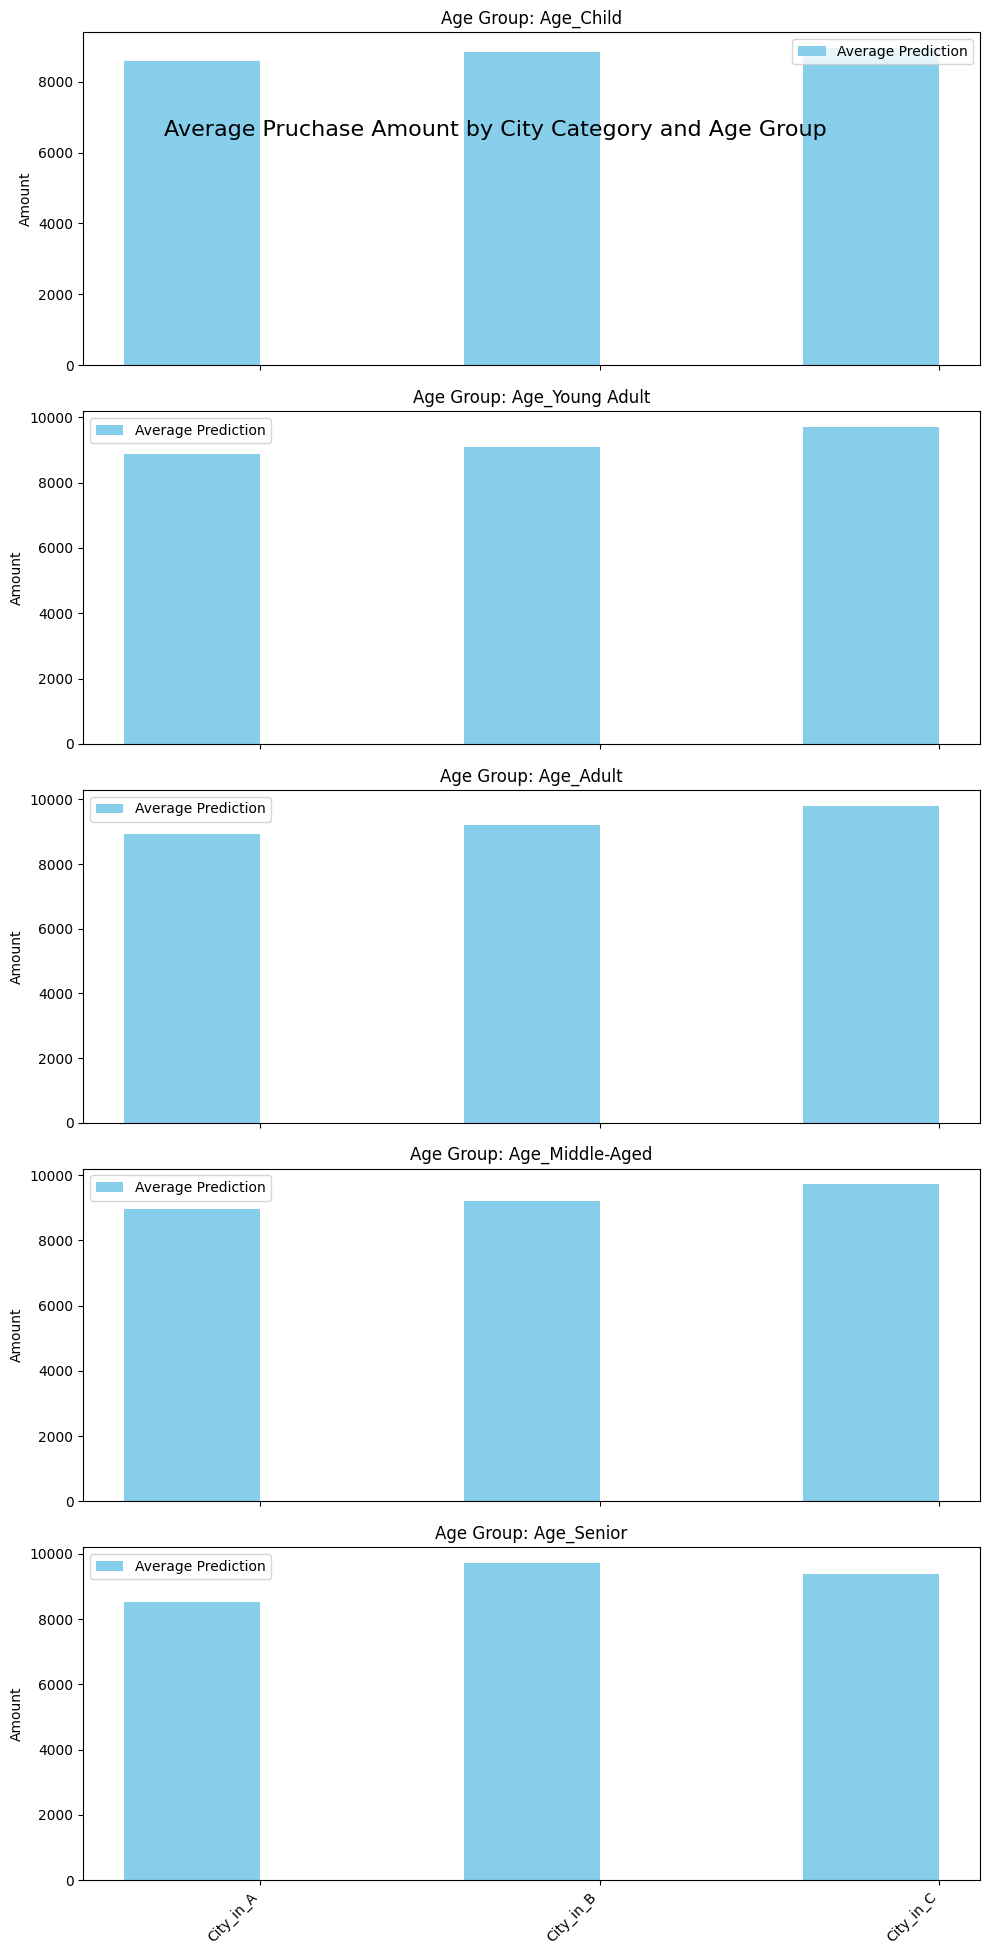

In [72]:
# Initialize an empty DataFrame to store the results
predictions_by_age_and_city = pd.DataFrame(columns=['Age Group', 'City Category', 'Average Prediction', 'Total Purchase Amount'])

# Define age groups and city categories
age_groups = ['Age_Child', 'Age_Young Adult', 'Age_Adult', 'Age_Middle-Aged', 'Age_Senior']
city_categories = ['City_in_A', 'City_in_B', 'City_in_C']

# Iterate over each combination of age group and city category
for age_group in age_groups:
    for city in city_categories:
        # Filter data for the current age group and city category
        filtered_data = test_predictions_xgb[(X_test[age_group] == 1) & (X_test[city] == 1)]
        
        # Calculate the average prediction for the current age group and city category
        average_prediction = filtered_data.mean()
        
        # Calculate the total purchase amount for the current age group and city category
        total_purchase_amount = filtered_data.sum()
        
        # Append the results to the DataFrame
        predictions_by_age_and_city = predictions_by_age_and_city.append({
            'Age Group': age_group,
            'City Category': city,
            'Average Prediction': average_prediction,
            'Total Purchase Amount': total_purchase_amount
        }, ignore_index=True)

import matplotlib.pyplot as plt
import numpy as np

# Create figure and axis objects
fig, axs = plt.subplots(5, 1, figsize=(10, 20), sharex=True)

# Define colors for bars
colors = ['skyblue', 'lightgreen']

# Iterate over each age group
for i, age_group in enumerate(['Age_Child', 'Age_Young Adult', 'Age_Adult', 'Age_Middle-Aged', 'Age_Senior']):
    # Filter data for the current age group
    age_group_data = predictions_by_age_and_city[predictions_by_age_and_city['Age Group'] == age_group]
    
    # Define x-axis labels (city categories)
    x_labels = age_group_data['City Category']
    
    # Define bar positions
    x = np.arange(len(x_labels))
    
    # Plot average prediction
    axs[i].bar(x - 0.2, age_group_data['Average Prediction'], width=0.4, color=colors[0], label='Average Prediction')
    

    # Set title and labels
    axs[i].set_title(f'Age Group: {age_group}')
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(x_labels, rotation=45, ha='right')
    axs[i].set_ylabel('Amount')
    axs[i].legend()

# Add overall title
plt.suptitle('Average Pruchase Amount by City Category and Age Group', fontsize=16, y=0.92)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [73]:
### second we compare between each age group 

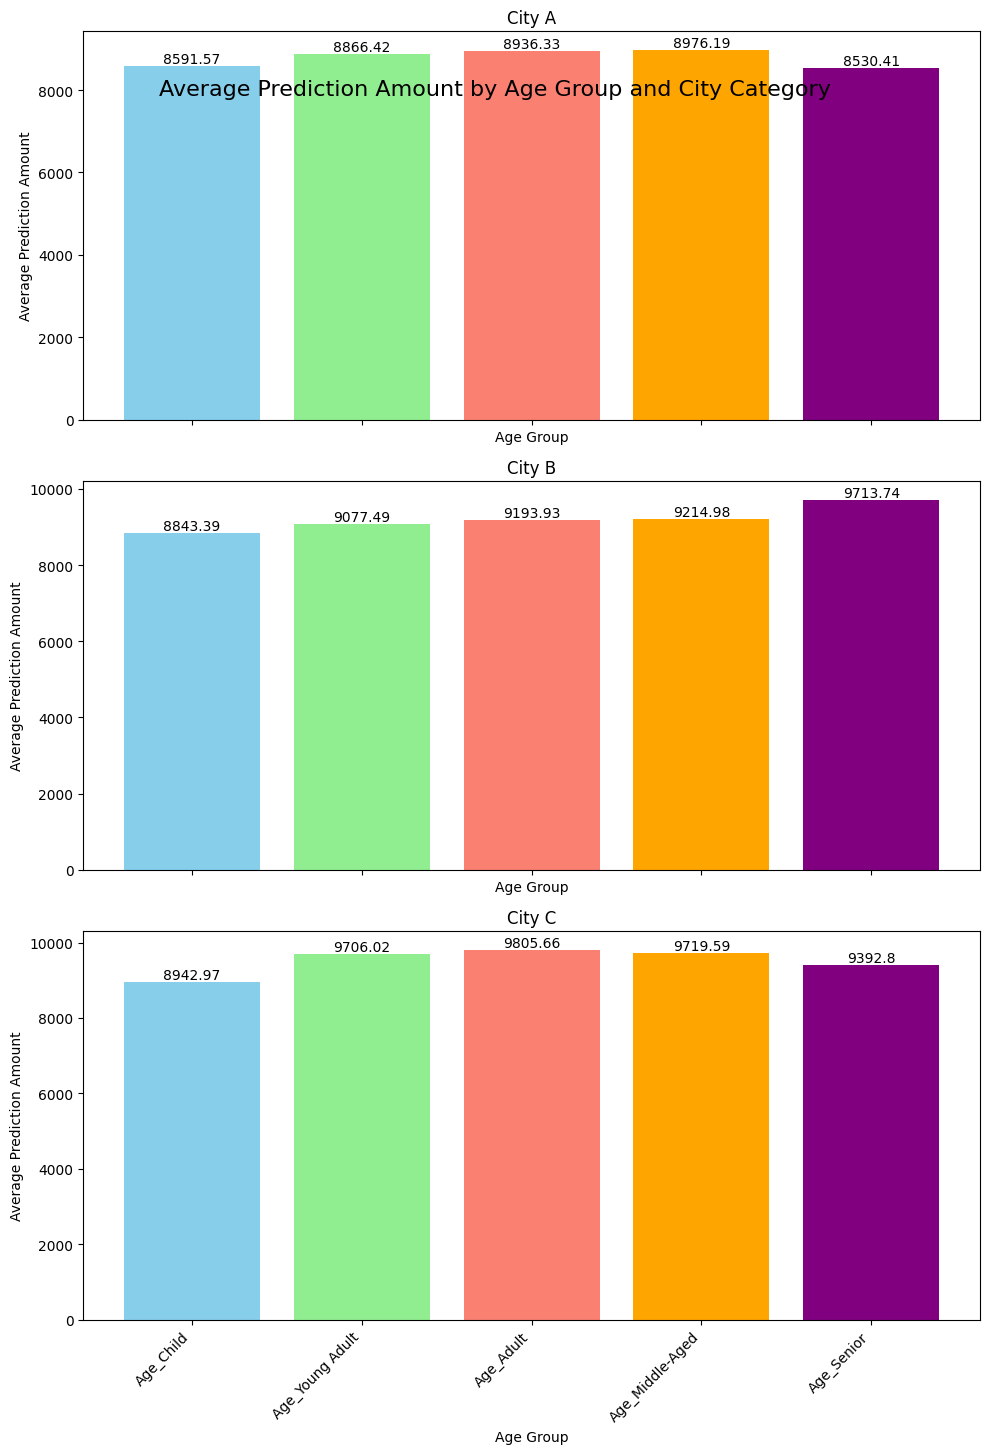

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Filter data for each city category
city_a_data = predictions_by_age_and_city[predictions_by_age_and_city['City Category'] == 'City_in_A']
city_b_data = predictions_by_age_and_city[predictions_by_age_and_city['City Category'] == 'City_in_B']
city_c_data = predictions_by_age_and_city[predictions_by_age_and_city['City Category'] == 'City_in_C']

# Define age groups
age_groups = ['Age_Child', 'Age_Young Adult', 'Age_Adult', 'Age_Middle-Aged', 'Age_Senior']

# Create figure and axis objects
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Define colors for bars
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'purple']

# Iterate over each city category
for i, (city_data, city_name) in enumerate(zip([city_a_data, city_b_data, city_c_data], ['City A', 'City B', 'City C'])):
    # Define x-axis labels (age groups)
    x_labels = city_data['Age Group']
    
    # Define bar positions
    x = np.arange(len(x_labels))
    
    # Plot average prediction
    bars = axs[i].bar(x, city_data['Average Prediction'], color=colors)
    
    # Add labels to bars
    for bar in bars:
        height = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width() / 2, 
                    height, 
                    round(height, 2), 
                    ha='center', 
                    va='bottom')
    
    # Set title and labels
    axs[i].set_title(f'{city_name}')
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(x_labels, rotation=45, ha='right')
    axs[i].set_ylabel('Average Prediction Amount')
    axs[i].set_xlabel('Age Group')

# Add overall title
plt.suptitle('Average Prediction Amount by Age Group and City Category', fontsize=16, y=0.92)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


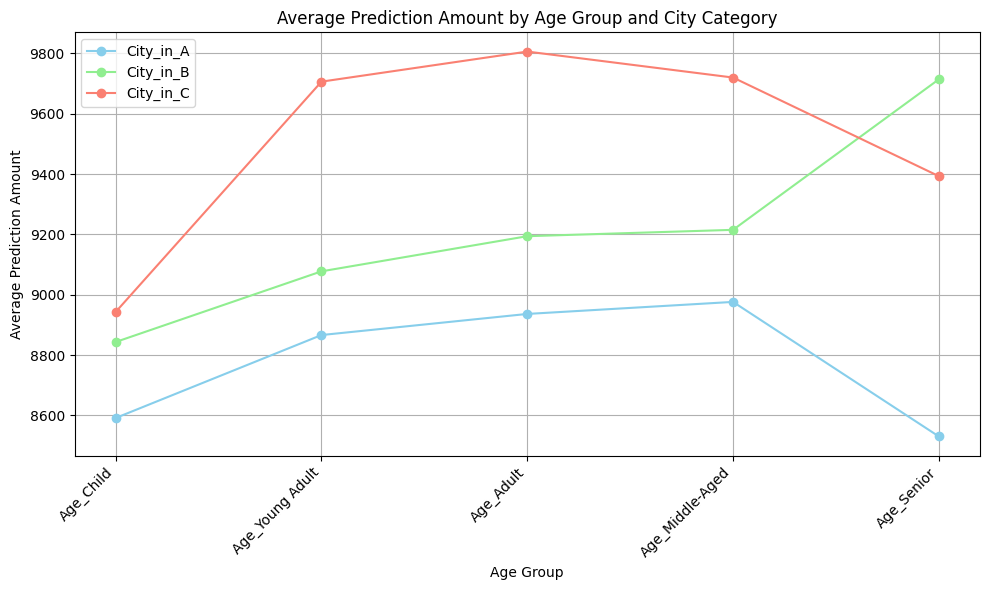

In [75]:
import matplotlib.pyplot as plt

# Define age groups
age_groups = ['Age_Child', 'Age_Young Adult', 'Age_Adult', 'Age_Middle-Aged', 'Age_Senior']

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for lines
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'purple']

# Iterate over each city category
for i, city_category in enumerate(['City_in_A', 'City_in_B', 'City_in_C']):
    # Filter data for the current city category
    city_data = predictions_by_age_and_city[predictions_by_age_and_city['City Category'] == city_category]
    
    # Plot average prediction as a line
    ax.plot(age_groups, city_data['Average Prediction'], marker='o', color=colors[i], label=city_category)

# Add legend
ax.legend()

# Set title and labels
ax.set_title('Average Prediction Amount by Age Group and City Category')
ax.set_xlabel('Age Group')
ax.set_ylabel('Average Prediction Amount')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


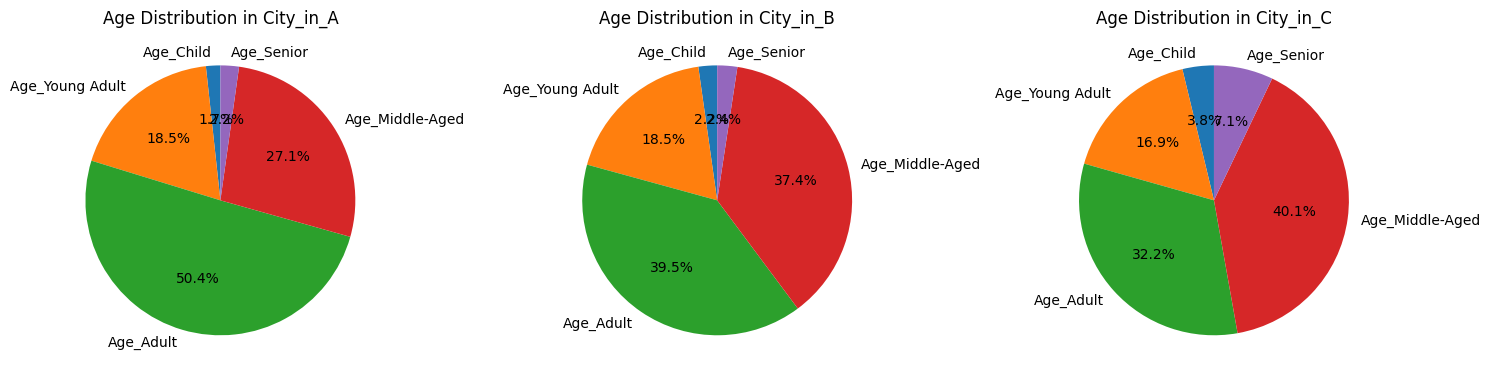

In [76]:
import matplotlib.pyplot as plt

# Define city categories
city_categories = ['City_in_A', 'City_in_B', 'City_in_C']

# Create subplots for each city category
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Iterate over each city category
for i, city_category in enumerate(city_categories):
    # Filter data for the current city category
    city_data = predictions_by_age_and_city[predictions_by_age_and_city['City Category'] == city_category]
    
    # Calculate percentage of each age group
    total_counts = city_data['Total Purchase Amount'].sum()
    percentages = [(count / total_counts) * 100 for count in city_data['Total Purchase Amount']]
    
    # Plot pie chart
    axs[i].pie(percentages, labels=city_data['Age Group'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Age Distribution in {city_category}')

# Adjust layout·
plt.tight_layout()
plt.show()


In [77]:
# Calculate the sum of each city category
city_a_sum = X_test['City_in_A'].sum()
city_b_sum = X_test['City_in_B'].sum()
city_c_sum = X_test['City_in_C'].sum()

# Print the sum of each city category
print("Sum of City A:", city_a_sum)
print("Sum of City B:", city_b_sum)
print("Sum of City C:", city_c_sum)


Sum of City A: 36842
Sum of City B: 57957
Sum of City C: 42718


### City A and B has pretty similar purcahse behavior until age_senior, where the ave purchase amt goes high in city b but low in city a, but they have pretty similar distribution of senior, hence we can have some thought about how to stimulate the purchase power of elder in city A. Also one reason why city b has high purchase power of senior might be because the advertisting technique is correctly use for the senior group such as using radio, so personalizing advertisment for target group will be necessary 

### City C shows a huge increment from child to young_adult, potential reason might be there is more college student in City C which drags up the purchase power compare to two others, and black friday is in fall semester, hence most likely the students stay in the city, hence heavier student discount can be settled if want to attract more college student.... other two cities share similar percentage of young adult as well, so perhaps setting student discount will also be sufficient to boost the sale. 

### age_adult and age_mid tends to be more rational on purchasing, hence their purchase behavior is pretty stable, however we can think another way, let's see their how many unit do they puchase in different categoreies

In [78]:
X_test['Predictions'] = test_predictions_xgb

### let's first see the patterns of purchase power under each category groups, here we seperate the each Product Category by the number of owned product. owned product is split by 0-5 , 6-10 and 10+ 

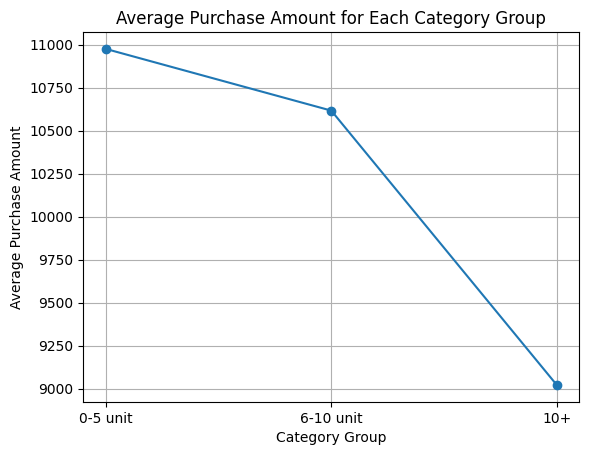

In [79]:
import pandas as pd
import numpy as np

# Define age groups
age_groups = ['Age_Child', 'Age_Young Adult', 'Age_Adult', 'Age_Middle-Aged', 'Age_Senior']

# Define thresholds for categorizing
thresholds = [0, 5, 10, np.inf]

# Initialize an empty DataFrame to store the results
results = pd.DataFrame(columns=['Age Group', 'Category', 'Category Group', 'Average Prediction', 'Total Prediction Amount'])

# Iterate over each age group
for age_group in age_groups:
    # Filter data for the current age group
    age_group_data = X_test[X_test[age_group] == 1]
    
    # Iterate over each category
    for category in ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']:
        # Categorize data into groups based on thresholds
        age_group_data['Category_Group'] = pd.cut(age_group_data[category].clip(lower=0), bins=thresholds, labels=['0-5 unit', '6-10 unit', '10+'])
        
        # Group by category group and calculate average and total prediction amount
        grouped_data = age_group_data.groupby('Category_Group')['Predictions']
        average_prediction = grouped_data.mean()
        total_prediction_amount = grouped_data.sum()
        
        # Append the results to the DataFrame
        for group, avg_pred, total_pred in zip(average_prediction.index, average_prediction.values, total_prediction_amount.values):
            results = results.append({
                'Age Group': age_group,
                'Category': category,
                'Category Group': group,
                'Average Prediction': avg_pred,
                'Total Prediction Amount': total_pred
            }, ignore_index=True)


# Group by category group and calculate the average purchase amount
average_purchase_amount = results.groupby('Category Group')['Average Prediction'].mean()

import matplotlib.pyplot as plt

# Reorder the index
average_purchase_amount = average_purchase_amount.reindex(['0-5 unit', '6-10 unit', '10+'])

# Plot the average purchase amount for each category group as a line chart
plt.plot(average_purchase_amount.index, average_purchase_amount.values, marker='o', linestyle='-')
plt.title('Average Purchase Amount for Each Category Group')
plt.xlabel('Category Group')
plt.ylabel('Average Purchase Amount')
plt.grid(True)
plt.show()

### clearly with more owned products of each category in hand, client tends to buy less, hence we need to simulate more for thoes with less apperance, one potential guess is that, new commer will have less relative apperance, let's see if this is the case 

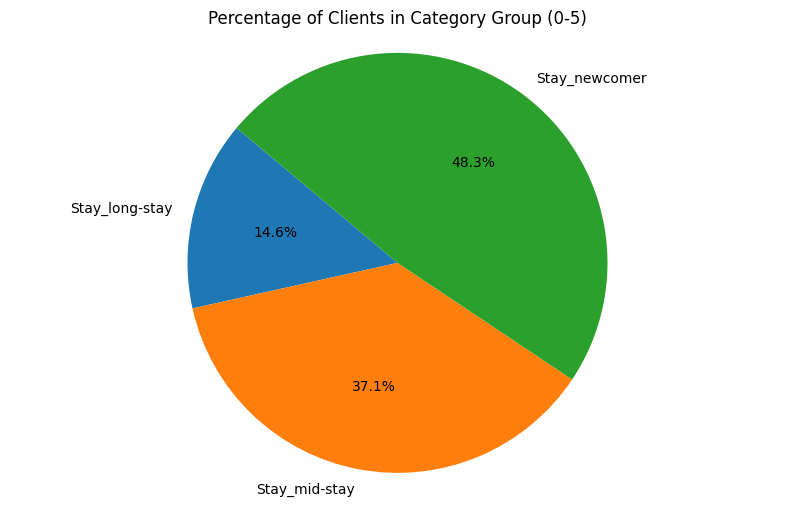

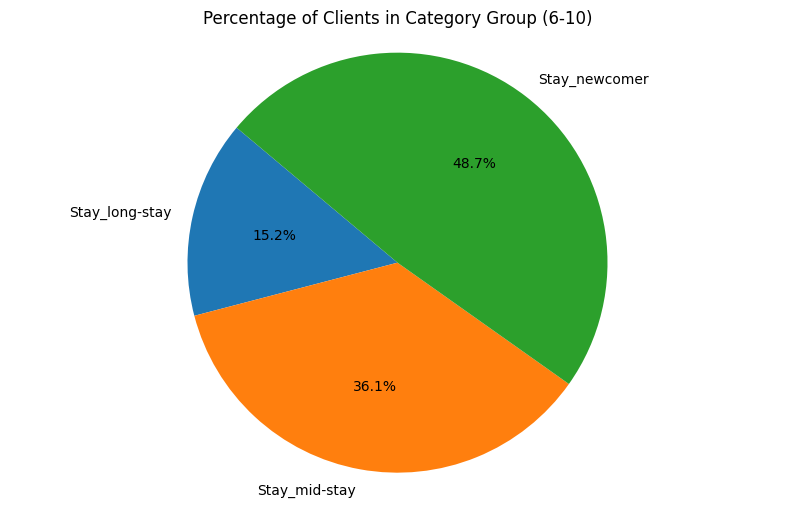

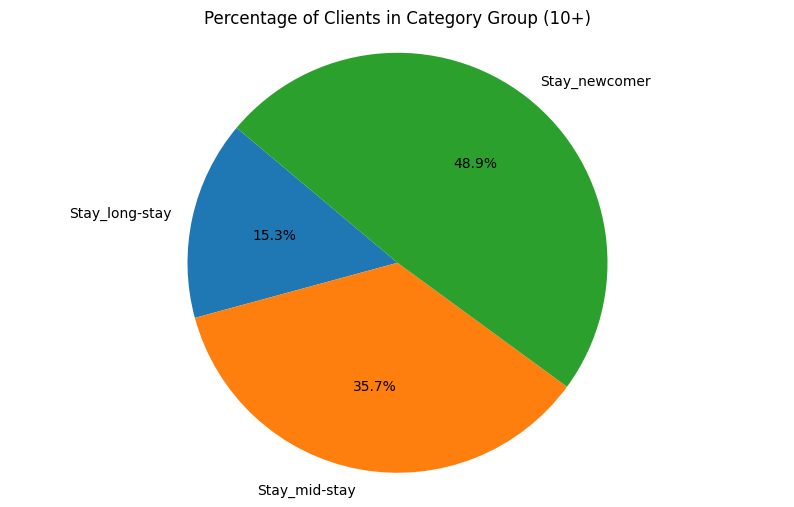

In [80]:
# Initialize empty dictionaries to store the counts for each category group
count_0_5 = {}
count_6_10 = {}
count_10_plus = {}

# Define the criteria for each category group
criteria_0_5 = (X_test['Product_Category_1'] < 5) & (X_test['Product_Category_2'] < 5) & (X_test['Product_Category_3'] < 5)
criteria_6_10 = (X_test['Product_Category_1'] >= 5) & (X_test['Product_Category_1'] < 10) & \
                 (X_test['Product_Category_2'] >= 5) & (X_test['Product_Category_2'] < 10) & \
                 (X_test['Product_Category_3'] >= 5) & (X_test['Product_Category_3'] < 10)
criteria_10_plus = (X_test['Product_Category_1'] >= 10) | (X_test['Product_Category_2'] >= 10) | \
                   (X_test['Product_Category_3'] >= 10)

# Count the number of clients in each category group based on the Stay columns
count_0_5['Stay_long-stay'] = X_test[criteria_0_5 & (X_test['Stay_long-stay'] == 1)].shape[0]
count_0_5['Stay_mid-stay'] = X_test[criteria_0_5 & (X_test['Stay_mid-stay'] == 1)].shape[0]
count_0_5['Stay_newcomer'] = X_test[criteria_0_5 & (X_test['Stay_newcomer'] == 1)].shape[0]

count_6_10['Stay_long-stay'] = X_test[criteria_6_10 & (X_test['Stay_long-stay'] == 1)].shape[0]
count_6_10['Stay_mid-stay'] = X_test[criteria_6_10 & (X_test['Stay_mid-stay'] == 1)].shape[0]
count_6_10['Stay_newcomer'] = X_test[criteria_6_10 & (X_test['Stay_newcomer'] == 1)].shape[0]

count_10_plus['Stay_long-stay'] = X_test[criteria_10_plus & (X_test['Stay_long-stay'] == 1)].shape[0]
count_10_plus['Stay_mid-stay'] = X_test[criteria_10_plus & (X_test['Stay_mid-stay'] == 1)].shape[0]
count_10_plus['Stay_newcomer'] = X_test[criteria_10_plus & (X_test['Stay_newcomer'] == 1)].shape[0]

# Data for pie charts
labels = ['Stay_long-stay', 'Stay_mid-stay', 'Stay_newcomer']

# Function to plot pie chart
def plot_pie_chart(counts, title):
    plt.figure(figsize=(10, 6))
    plt.pie(counts.values(), labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

# Plot pie charts for each category group
plot_pie_chart(count_0_5, "Percentage of Clients in Category Group (0-5)")
plot_pie_chart(count_6_10, "Percentage of Clients in Category Group (6-10)")
plot_pie_chart(count_10_plus, "Percentage of Clients in Category Group (10+)")



### we can see here, new comer has the highest population under each category group, now let's also look at new comers purchase power 

In [81]:
# Define the categories
categories = ['Stay_long-stay', 'Stay_mid-stay', 'Stay_newcomer']

# Initialize an empty dictionary to store the results
average_purchase_by_stay = {}

# Iterate over each category
for category in categories:
    # Filter data for the current category
    filtered_data = X_test[X_test[category] == 1]
    
    # Sum the predictions for the current category
    total_predictions = filtered_data['Predictions'].sum()
    
    # Calculate the number of samples in the current category
    num_samples = filtered_data.shape[0]
    
    # Calculate the average purchase amount for the current category
    average_purchase_by_stay[category] = total_predictions / num_samples

# Display the average purchase amount for each category
print("Average Purchase Amount by Category:")
for category, average_purchase in average_purchase_by_stay.items():
    print(f"{category}: {average_purchase}")


Average Purchase Amount by Category:
Stay_long-stay: 9287.242424242424
Stay_mid-stay: 9335.633335369454
Stay_newcomer: 9215.910587955532


In [82]:
import pandas as pd
import numpy as np

# Define the categories
stay_categories = ['Stay_long-stay', 'Stay_mid-stay', 'Stay_newcomer']

# Define thresholds for categorizing
thresholds = [0, 5, 10, np.inf]

# Initialize an empty DataFrame to store the results
results = pd.DataFrame(columns=['Stay Category', 'Category', 'Category Group', 'Average Prediction', 'Total Prediction Amount'])

# Iterate over each stay category
for stay_category in stay_categories:
    # Filter data for the current stay category
    stay_category_data = X_test[X_test[stay_category] == 1]
    
    # Iterate over each category
    for category in ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']:
        # Categorize data into groups based on thresholds
        stay_category_data['Category_Group'] = pd.cut(stay_category_data[category].clip(lower=0), bins=thresholds, labels=['0-5 unit', '6-10 unit', '10+'])
        
        # Group by category group and calculate average and total prediction amount
        grouped_data = stay_category_data.groupby('Category_Group')['Predictions']
        average_prediction = grouped_data.mean()
        total_prediction_amount = grouped_data.sum()
        
        # Append the results to the DataFrame
        for group, avg_pred, total_pred in zip(average_prediction.index, average_prediction.values, total_prediction_amount.values):
            results = results.append({
                'Stay Category': stay_category,
                'Category': category,
                'Category Group': group,
                'Average Prediction': avg_pred,
                'Total Prediction Amount': total_pred
            }, ignore_index=True)



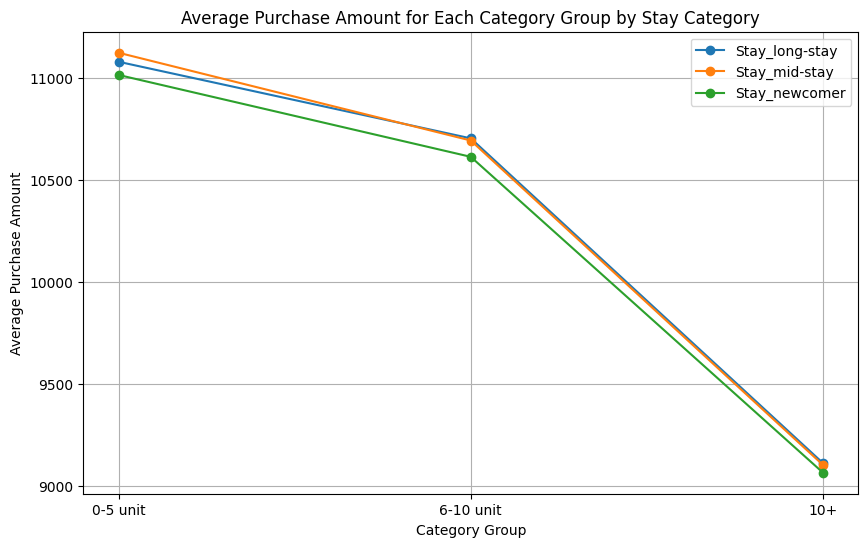

In [83]:
import matplotlib.pyplot as plt

# Define the stay categories
stay_categories = ['Stay_long-stay', 'Stay_mid-stay', 'Stay_newcomer']

# Initialize a plot
plt.figure(figsize=(10, 6))

# Iterate over each stay category
for stay_category in stay_categories:
    # Group by category group and calculate the average purchase amount
    average_purchase_amount = results[results['Stay Category'] == stay_category].groupby('Category Group')['Average Prediction'].mean()
    
    # Reorder the index
    average_purchase_amount = average_purchase_amount.reindex(['0-5 unit', '6-10 unit', '10+'])
    
    # Plot the average purchase amount for each category group as a line chart
    plt.plot(average_purchase_amount.index, average_purchase_amount.values, marker='o', linestyle='-', label=stay_category)

# Add title and labels
plt.title('Average Purchase Amount for Each Category Group by Stay Category')
plt.xlabel('Category Group')
plt.ylabel('Average Purchase Amount')
plt.grid(True)
plt.legend()
plt.show()


### with the bar chart and line chart, we can see new comer has the highest proportion of the population but their purchase power is not as strong as other two groups, even when they have low unit of categories. Hence it will be a good idea to stimulate the purchase power of new comer on black friday, for instance, for if there is any clearance product and that is necessary for new comer, try to sale them with much attractive price, which in one way can clear the inventory, also increase the overall sales.

## overall strategy: 1) stimulate more female purcahse power. 2) stimulate young_adult and senior for specific city. 3) stimulate new comer and with less owned products in hand 